# **HEART DISEASE PREDICTION**

## **INTRODUCTION**
### **Objectives**

The objective of my project on heart disease prediction is to create a sophisticated model that evaluates the likelihood of heart disease in individuals, using a comprehensive set of health indicators. This model leverages advanced machine learning techniques to dissect and understand the complexities associated with heart disease. The analysis incorporates critical biometric data—such as blood pressure, cholesterol levels, and heart rate—alongside lifestyle factors and detailed medical histories. The end goal is to deliver a powerful tool that assists healthcare providers in pinpointing patients at risk, thereby facilitating early interventions and enhancing overall patient health outcomes by mitigating the risks associated with heart disease.

### **Dataset**

#### **Overview**


The dataset was received from [UCI](https://archive.ics.uci.edu/dataset/45/heart+disease). The original database contains 76 attributes, but we like to concentrate on a subset of 14 of them and the Cleveland database with 303 instances, because it is most suitable for machine learning purposes. The "target" refers to the presence of heart disease in the patient.

#### **Data Dictionary**

| Feature Name | Description                                               | Format          | Values                                                                                    |
|--------------|-----------------------------------------------------------|-----------------|--------------------------------------------------------------------------------------------|
| age          | Age of the individual                                     | Integer         |                                                                                            |
| sex          | Gender of the individual                                  | Integer         | 1 = male, 0 = female                                                                       |
| cp           | Type of chest pain experienced                            | Integer         | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic           |
| restbps      | Resting blood pressure value in mmHg                      | Integer         | (mmHg)                                                                                     |
| chol         | Serum cholesterol in mg/dl                                | Integer         | (mg/dl)                                                                                    |
| fbs          | Fasting blood sugar > 120mg/dl                            | Integer         | 1 = true (> 120mg/dl), 0 = false (≤ 120mg/dl)                                              |
| restecg      | Resting electrocardiographic results                      | Integer         | 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hypertrophy             |
| thalach      | Maximum heart rate achieved by an individual              | Integer         |                                                                                            |
| exang        | Whether exercise induced angina                           | Integer         | 1 = yes, 0 = no                                                                            |
| st_dep       | ST depression induced by exercise relative to rest        | Integer or Float|                                                                                            |
| slope        | ST segment measured at peak exercise                      | Integer         | 1 = upsloping, 2 = flat, 3 = downsloping                                                   |
| vessels      | Number of major vessels (0-3) colored by fluoroscopy      | Integer or Float| (0-3)                                                                                      |
| thal         | Type of thalassemia                                       | Integer         | 3 = normal, 6 = fixed defect, 7 = reversible defect                                        |
| target       | Diagnosis of heart disease                                | Integer         | 0 = absence, 1, 2, 3, 4 = present (1-4 indicating varying degrees of heart disease presence)                           |


## **Load, Clean and Transform Data**

### **First exploration**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

# Filter Future warnings
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

# Ignore all warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [52]:
# Gathering data
df = pd.read_csv('../data/cleveland.csv', header = None)

# Name columns
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'st_dep', 'slope', 'vessels', 'thal', 'target']

# Show first rows
print("First rows:")
display(df.head(5))


# Get first understanding of the dataset
print(df.info())


First rows:


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,st_dep,slope,vessels,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   st_dep   303 non-null    float64
 10  slope    303 non-null    int64  
 11  vessels  299 non-null    float64
 12  thal     301 non-null    float64
 13  target   303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


Based on this summary, the dataset appears well-structured and mostly complete, making it a good candidate for predictive modeling for heart disease presence. The minor missing data in ca and thal will require attention before modeling to ensure accurate predictions.

### **Descriptive Statistics**

In [53]:
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,st_dep,slope,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### **Unique Values**

In [54]:
# Define a list of columns to display unique values for
columns_to_inspect = [
    'sex', 'cp', 'fbs', 'restecg', 
    'exang', 'slope', 
    'vessels', 'thal', 
    'target',
    'st_dep'
]

# Loop through the columns to iterate and display unique values for each column
for column in columns_to_inspect:
    # Check if the column exists in the DataFrame, as exact column names might vary
    if column in df.columns:
        # Print unique values found in the column
        print(f"Unique values in '{column}': {df[column].unique()}")
    else:
        # Notify if the column does not exist in the DataFrame
        print(f"Column '{column}' does not exist in the DataFrame.")


Unique values in 'sex': [1 0]
Unique values in 'cp': [1 4 3 2]
Unique values in 'fbs': [1 0]
Unique values in 'restecg': [2 0 1]
Unique values in 'exang': [0 1]
Unique values in 'slope': [3 2 1]
Unique values in 'vessels': [ 0.  3.  2.  1. nan]
Unique values in 'thal': [ 6.  3.  7. nan]
Unique values in 'target': [0 2 1 3 4]
Unique values in 'st_dep': [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]


### **Missing values**

In [55]:
# List of columns with missing values
columns_with_missing_values = ['vessels', 'thal']

# Apply the median to each of the columns with missing values
for column in columns_with_missing_values:
    # Calculate the median for the current column
    median_value = df[column].median()
    
    # Replace missing values with the median of the column
    df[column].fillna(median_value, inplace=True)


### **Transformations**

#### **Target**

In [56]:
# Create binary column for target
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df.target.unique()


array([0, 1], dtype=int64)

#### **Age**

In [57]:
# Divide the 'age' column into age bands of 10 years with corrected bins and labels
df['age_band'] = pd.cut(df['age'], bins=range(20, 81, 10), right=False, labels=["20s", "30s", "40s", "50s", "60s", "70s"])

# Check the first few rows of the new 'age_band' column
print(df[['age', 'age_band']].head())


   age age_band
0   63      60s
1   67      60s
2   67      60s
3   37      30s
4   41      40s


#### **Datatype**

In [58]:
# Columns to categorize
columns_to_categorize = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal']

for column in columns_to_categorize:
    df[column] = df[column].astype('category')

# Deleting the 'age' column from the DataFrame
df.drop('age', axis=1, inplace=True)

# Check the new data types
# print(df.info())


#### **Replace numerical values** 

In [59]:
# Ersetzen der Werte in der 'sex'-Spalte
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})

# Ersetzen der Werte in der 'cp'-Spalte
df['cp'] = df['cp'].replace({
    1: 'typical angina',
    2: 'atypical angina',
    3: 'non-anginal pain',
    4: 'asymptomatic'
})

# Ersetzen der Werte in der 'fbs'-Spalte
df['fbs'] = df['fbs'].replace({1: '>120mg/dl', 0: '<=120mg/dl'})

# Ersetzen der Werte in der 'restecg'-Spalte
df['restecg'] = df['restecg'].replace({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

# Ersetzen der Werte in der 'exang'-Spalte
df['exang'] = df['exang'].replace({0: 'no', 1: 'yes'})

# Ersetzen der Werte in der 'slope'-Spalte
df['slope'] = df['slope'].replace({
    1: 'upsloping',
    2: 'flat',
    3: 'downsloping'
})

# Ersetzen der Werte in der 'ca' (vessels) Spalte
df['vessels'] = df['vessels'].replace({
    0.0: '0 vessels',
    1.0: '1 vessel',
    2.0: '2 vessels',
    3.0: '3 vessels'
    # Beachte, dass NaN-Werte separat behandelt werden müssen, falls gewünscht
})

# Ersetzen der Werte in der 'thal'-Spalte
df['thal'] = df['thal'].replace({
    3.0: 'normal',
    6.0: 'fixed defect',
    7.0: 'reversable defect'
    # Beachte, dass NaN-Werte separat behandelt werden müssen, falls gewünscht
})

# Ersetzen der Werte in der 'target'-Spalte
df['target'] = df['target'].replace({
    0: 'no disease',
    1: 'disease',
    2: 'disease',
    3: 'disease',
    4: 'disease'
})

# Überprüfe einige Zeilen, um die Änderungen zu sehen
display(df.head())


,sex,cp,restbps,chol,fbs,restecg,thalach,exang,st_dep,slope,vessels,thal,target,age_band
0,male,typical angina,145,233,>120mg/dl,left ventricular hypertrophy,150,no,2.3,downsloping,0 vessels,fixed defect,no disease,60s
1,male,asymptomatic,160,286,<=120mg/dl,left ventricular hypertrophy,108,yes,1.5,flat,3 vessels,normal,disease,60s
2,male,asymptomatic,120,229,<=120mg/dl,left ventricular hypertrophy,129,yes,2.6,flat,2 vessels,reversable defect,disease,60s
3,male,non-anginal pain,130,250,<=120mg/dl,normal,187,no,3.5,downsloping,0 vessels,normal,no disease,30s
4,female,atypical angina,130,204,<=120mg/dl,left ventricular hypertrophy,172,no,1.4,upsloping,0 vessels,normal,no disease,40s


## **Exploratory Data Analysis (EDA)**
### **Univariate Analysis**

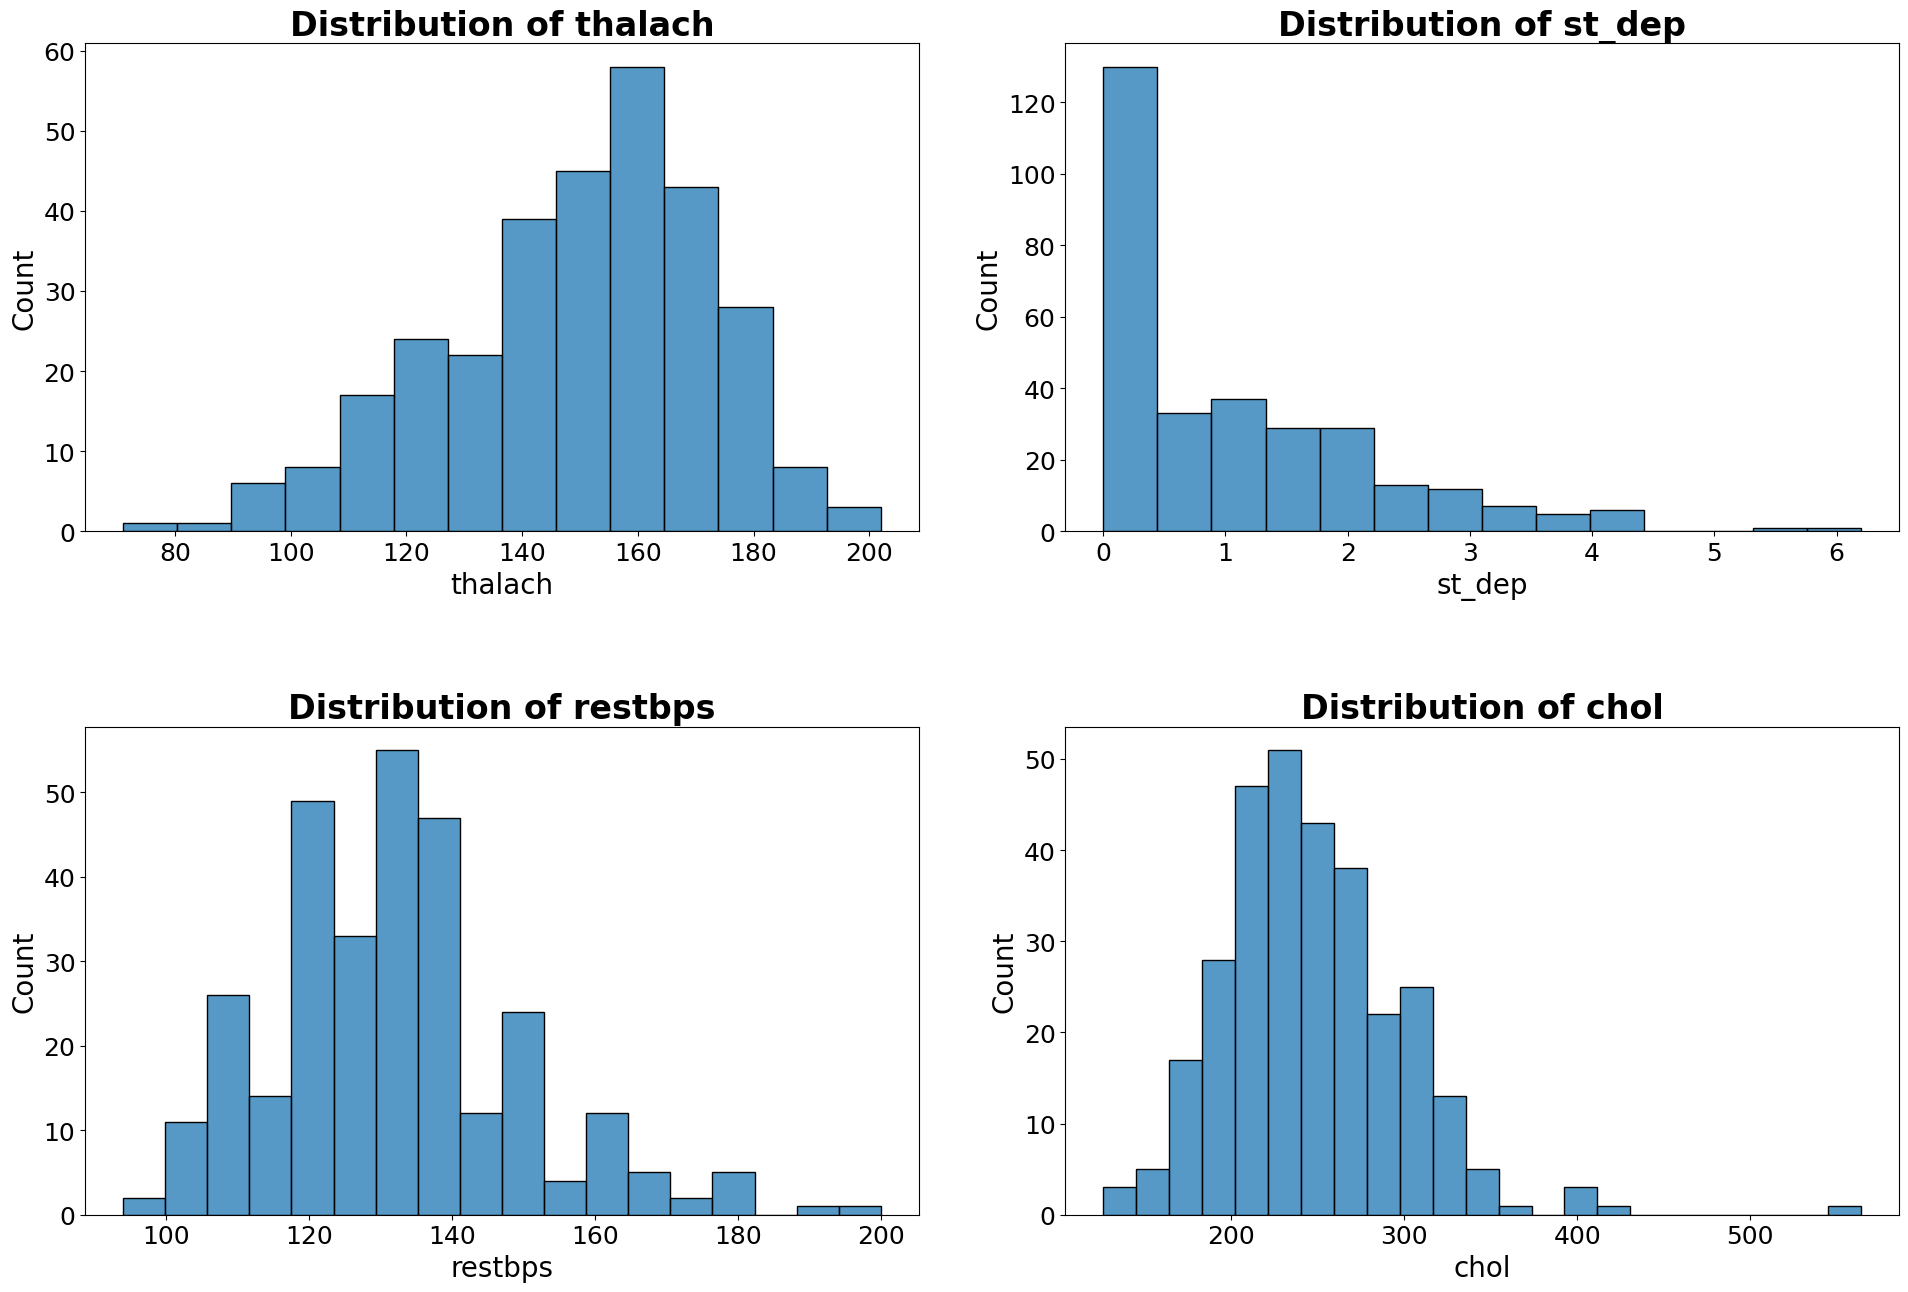

In [60]:
# Choose columns
numeric_columns = ['thalach', 'st_dep', 'restbps', 'chol']
num_subplots_per_row = 2

# Create histplots for each numerical column, split by the 'target' variable
plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // num_subplots_per_row + 1, num_subplots_per_row, i + 1)
    sns.histplot(data=df, x=column, multiple='stack', palette="YlGnBu", kde=False)
    plt.title(f'Distribution of {column}', fontweight="bold", fontsize=24)
    plt.xlabel(f'{column}', fontsize=20)  # Set the font size for x-axis label
    plt.ylabel('Count', fontsize=20)  # Set the font size for y-axis label, changing it to 'Count'
    plt.xticks(fontsize=18)  # Set the font size for x-axis ticks
    plt.yticks(fontsize=18)  # Set the font size for y-axis ticks

# Adjust the layout to give more space
plt.tight_layout(pad=4.0)  # Increase padding between figures
plt.subplots_adjust(hspace=0.4)  # Adjust horizontal space between rows

plt.show()

From the histograms we gain the following insights in terms of their distribution:

- **Thalach (Maximum Heart Rate Achieved):** The distribution of 'thalach' shows a unimodal pattern, peaking around the 150-160 beats per minute (bpm) mark. The distribution tails off as the heart rate values increase beyond this peak.

- **Restbps (Resting Blood Pressure):** The distribution of 'restbps' appears bimodal, with two apparent peaks: one around 120 mmHg and another around 140 mmHg. There are fewer individuals with resting blood pressure values on the lower and higher ends of the spectrum.

- **Chol (Serum Cholesterol):** The distribution of 'chol' is unimodal and slightly right-skewed, indicating that most individuals have cholesterol levels around 200-250 mg/dL, with fewer individuals having higher cholesterol levels.

- **ST_Dep (ST Depression):** The distribution of 'st_dep' is highly left-skewed with a mode at 0, indicating that most individuals have no ST depression. The frequency of ST depression decreases as the values increase, with very few individuals showing high ST depression levels.

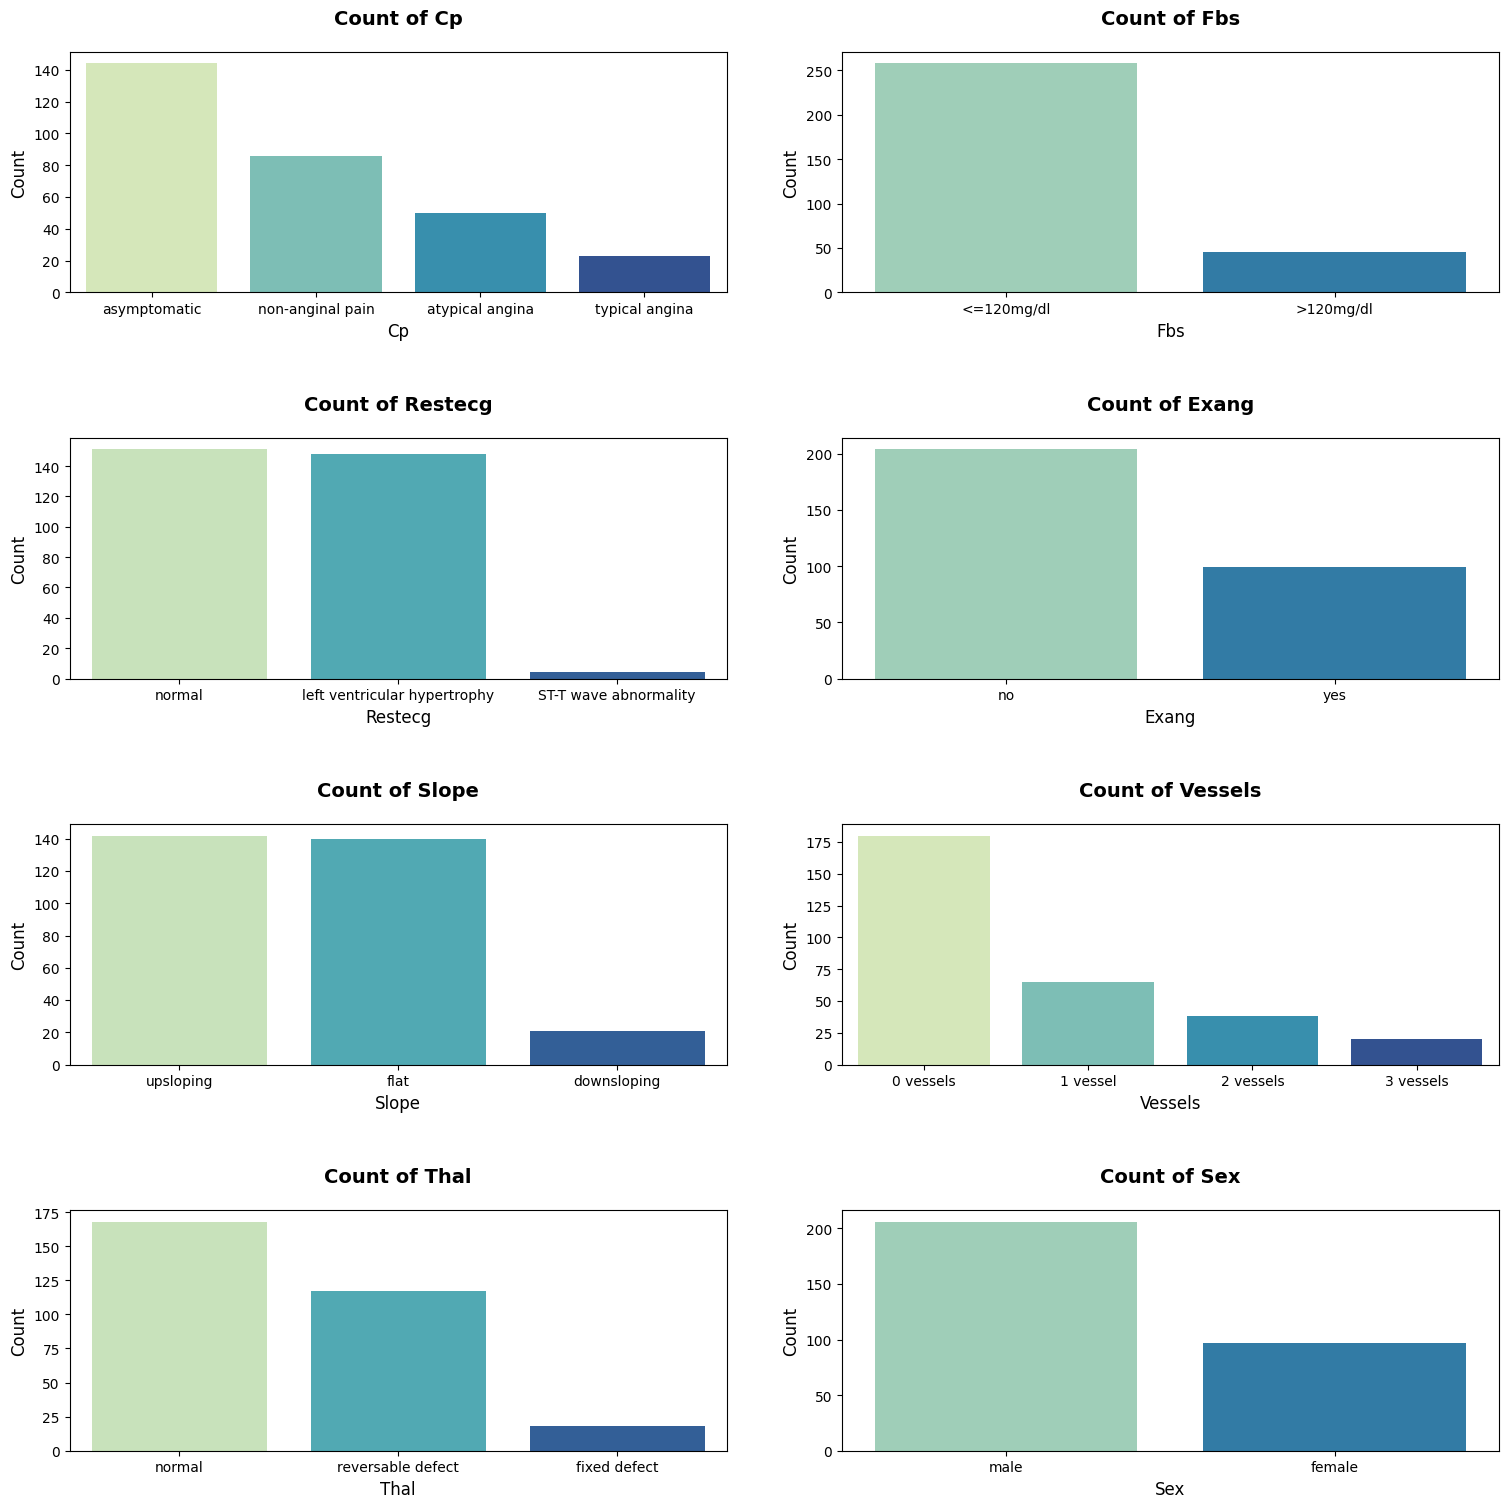

In [61]:
# Chooose columns
categorical_columns = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'sex']

# Set up the matplotlib figure
rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over if it's a 2D array

# Create count plots with sorted categories
for i, column in enumerate(categorical_columns):
    order = df[column].value_counts().index  # Get the categories sorted by count
    sns.countplot(x=column, data=df, ax=axes[i], palette="YlGnBu", order=order)
    axes[i].set_title(f'Count of {column.capitalize()}', fontsize=14, fontweight="bold", pad=20)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Remove the extra subplots if the number of categorical columns is odd
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout to give more space
plt.tight_layout(pad=4.0)  # Increase padding between figures
plt.show()

Based on the  count plots for various categorical variables, we can gain several insights about the dataset:

- **Chest Pain Type (Cp):** There's a varied distribution across the types of chest pain. It seems that asymptomatic chest pain is the most common among the individuals in the dataset, followed by non-anginal pain, atypical angina, and typical angina. This might suggest a prevalence of less severe chest pain symptoms in the population sampled.

- **Fasting Blood Sugar (Fbs):** The vast majority of individuals have fasting blood sugar levels less than or equal to 120 mg/dl, which is considered normal. A smaller number have fasting blood sugar levels greater than 120 mg/dl, indicating possible hyperglycemia.

- **Resting Electrocardiographic Results (Restecg):** The most common category here is 'normal,' followed by 'ST-T wave abnormality,' with 'left ventricular hypertrophy' being the least common. This indicates that most individuals in the dataset do not have notable ECG abnormalities.

- **Exercise Induced Angina (Exang):** A significant number of individuals do not experience angina induced by exercise, suggesting a lower prevalence of this condition in the dataset.

- **Slope of the Peak Exercise ST Segment (Slope):** The distribution shows that a 'flat' slope is most common, with 'upsloping' and 'downsloping' being less common.

- **Number of Major Vessels Colored by Fluoroscopy (Vessels):** The count decreases as the number of vessels increases. Most individuals have '0' vessels colored, with progressively fewer individuals having '1', '2', or '3' vessels colored.

- **Thalassemia (Thal):** 'Normal' thalassemia is the most prevalent, with 'reversible defect' being the next most common. 'Fixed defect' is the least common among the individuals.

- **Sex:** There are more males than females in the dataset.

### **Bivariate Analysis**

#### **Numeric-Numeric Relationships**

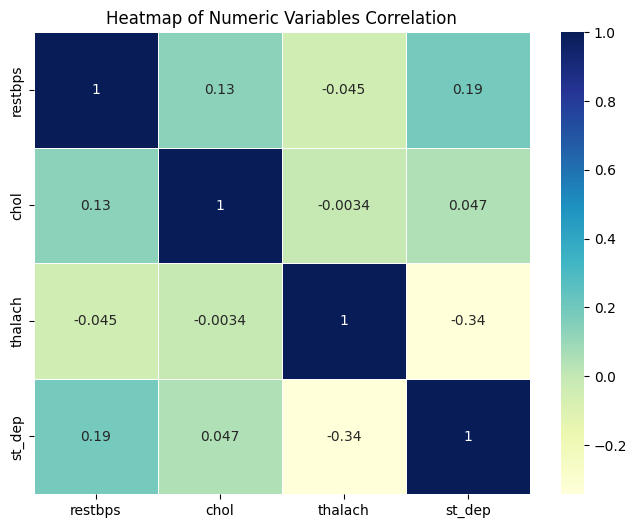

In [62]:
# Filter the DataFrame to include only numerical variables
df_numerical = df.select_dtypes(include=[np.number])


# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', cbar=True, linewidths=.5)
plt.title('Heatmap of Numeric Variables Correlation')
plt.show()

The heatmap of the numerical variables' correlation suggests the following:

- The strongest negative correlation is between 'thalach' and 'st_dep' (-0.34), suggesting that as maximum heart rate increases, ST depression decreases.
- 'Restbps' and 'st_dep' show a positive correlation (0.19), which might imply that higher blood pressure could be associated with more significant ST depression.
- The correlations between 'restbps' and 'chol' with 'thalach' are very weak, indicating little to no linear relationship.



#### **Numeric Categorical Relationships**
##### **ST Depression**

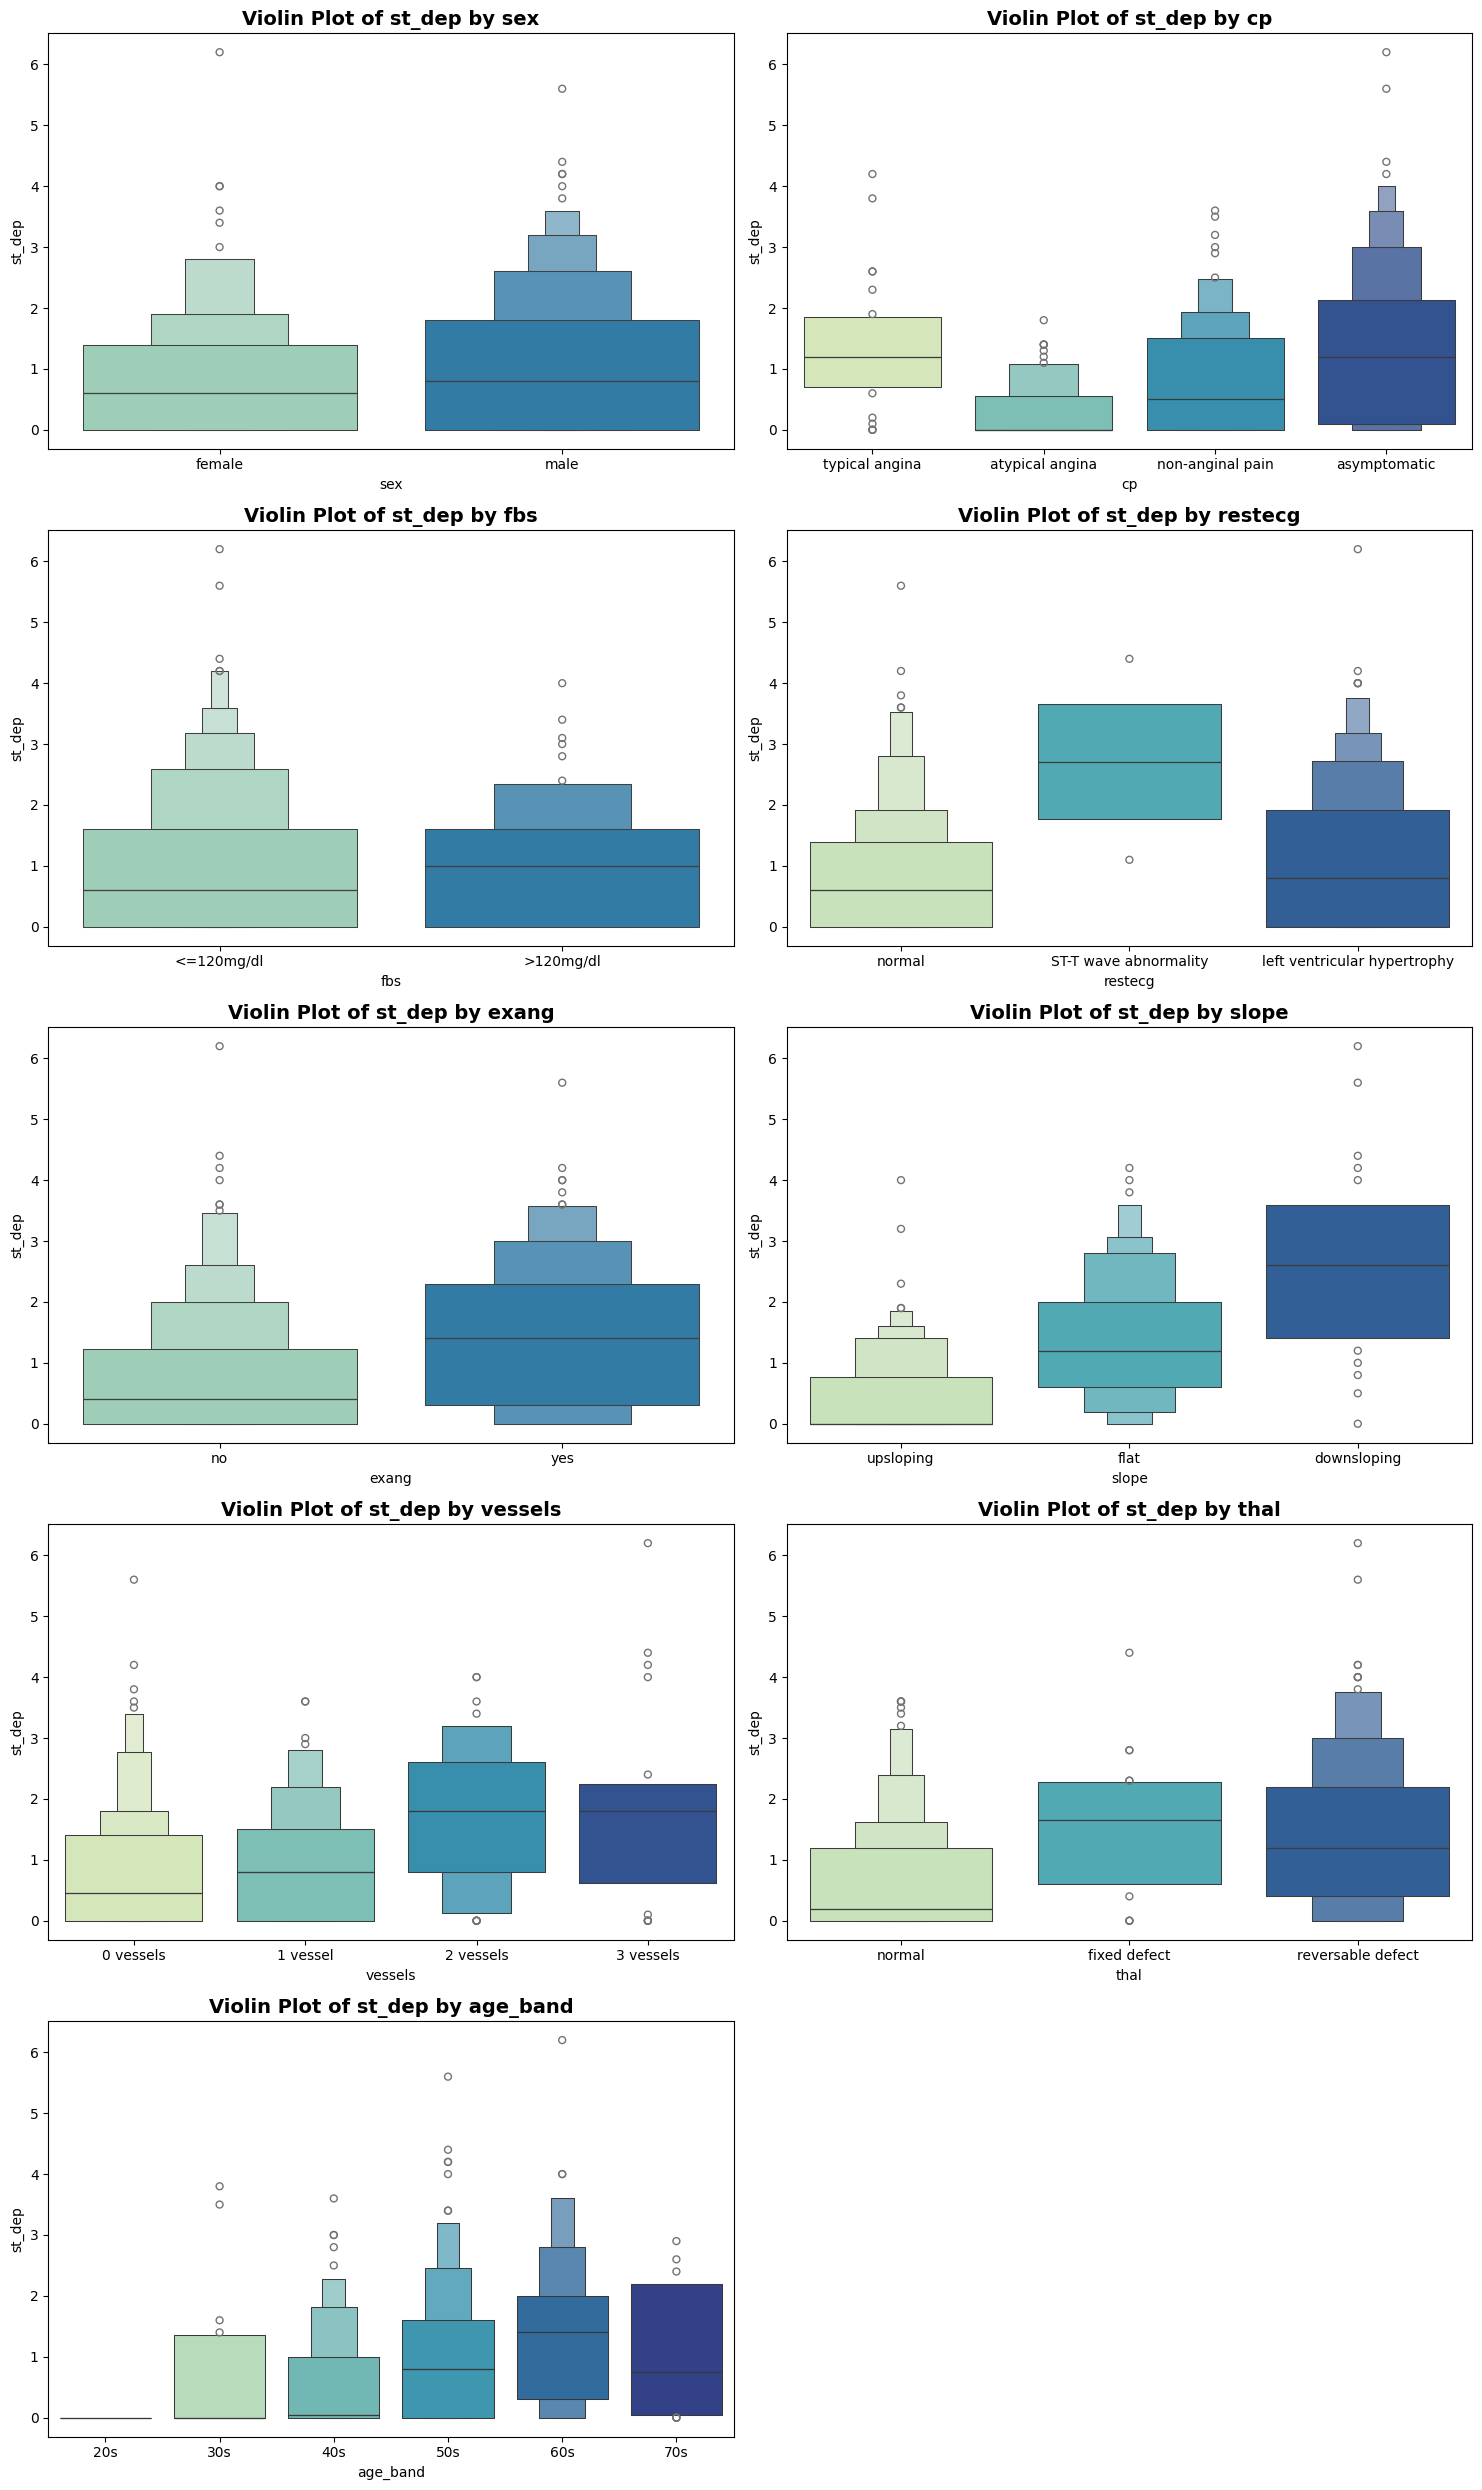

In [63]:
# Choose columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'age_band']
numeric_columns = ['st_dep']
num_plots = len(categorical_columns) * len(numeric_columns)

# Calculate the number of rows needed for subplots, based on the number of plots
num_subplots_per_row = 2
num_rows = num_plots // num_subplots_per_row + (num_plots % num_subplots_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size accordingly

# Create a violin plot for each pair of categorical and numerical columns
plot_number = 1
for numeric_col in numeric_columns:
    for category_col in categorical_columns:
        plt.subplot(num_rows, num_subplots_per_row, plot_number)
        sns.boxenplot(x=category_col, y=numeric_col, data=df, palette="YlGnBu")
        plt.title(f'Violin Plot of {numeric_col} by {category_col}', fontsize=14, fontweight="bold")
        plot_number += 1

plt.tight_layout()
plt.show()

From the violin plots depicting the distribution of 'st_dep' (ST depression) across various categories, we can observe the following:

- **By Sex:** The distribution of ST depression appears to be slightly wider for males than females, indicating a broader range of ST depression values in males. Both distributions have outliers indicating extreme values.

- **By Chest Pain Type (Cp):** There is variation in ST depression across different types of chest pain. Asymptomatic individuals show a broad range with several outliers, possibly indicating varied heart stress levels. Non-anginal pain seems to have a lower median ST depression, and atypical angina has a narrower distribution.

- **By Fasting Blood Sugar (Fbs):** The distribution of ST depression is wider for individuals with fasting blood sugar <= 120mg/dl compared to those with >120mg/dl. The presence of outliers in the <=120mg/dl group suggests that there are individuals with high ST depression values within this category.

- **By Resting ECG (Restecg):** Those with ST-T wave abnormality show a wider distribution and higher median ST depression than those with a normal ECG or left ventricular hypertrophy.

- **By Exercise Induced Angina (Exang):** Individuals who experienced exercise-induced angina ('yes') show a higher median ST depression compared to those who didn't ('no'), with a broader distribution and several outliers indicating higher levels of ST depression.

- **By Slope of the Peak Exercise ST Segment (Slope):** The distribution across slopes indicates the highest median ST depression and widest distribution in downsloping, followed by flat and then upsloping, which has the narrowest distribution.

- **By Number of Major Vessels (Vessels):** Individuals with more vessels colored (indicating potential blockages) tend to have a higher median ST depression. There is an increasing trend in median ST depression as the number of vessels increases, with the broadest distribution in the '3 vessels' category.

- **By Thalassemia (Thal):** The distribution of ST depression varies with the type of thalassemia. Those with a reversible defect show a higher median ST depression and a wider range than those with a fixed defect or normal thalassemia.

- **By Age Band:** The distribution of ST depression across age bands shows that older age bands (60s and 70s) tend to have higher median ST depression values and a broader range than younger age bands.

##### **Cholestrol**

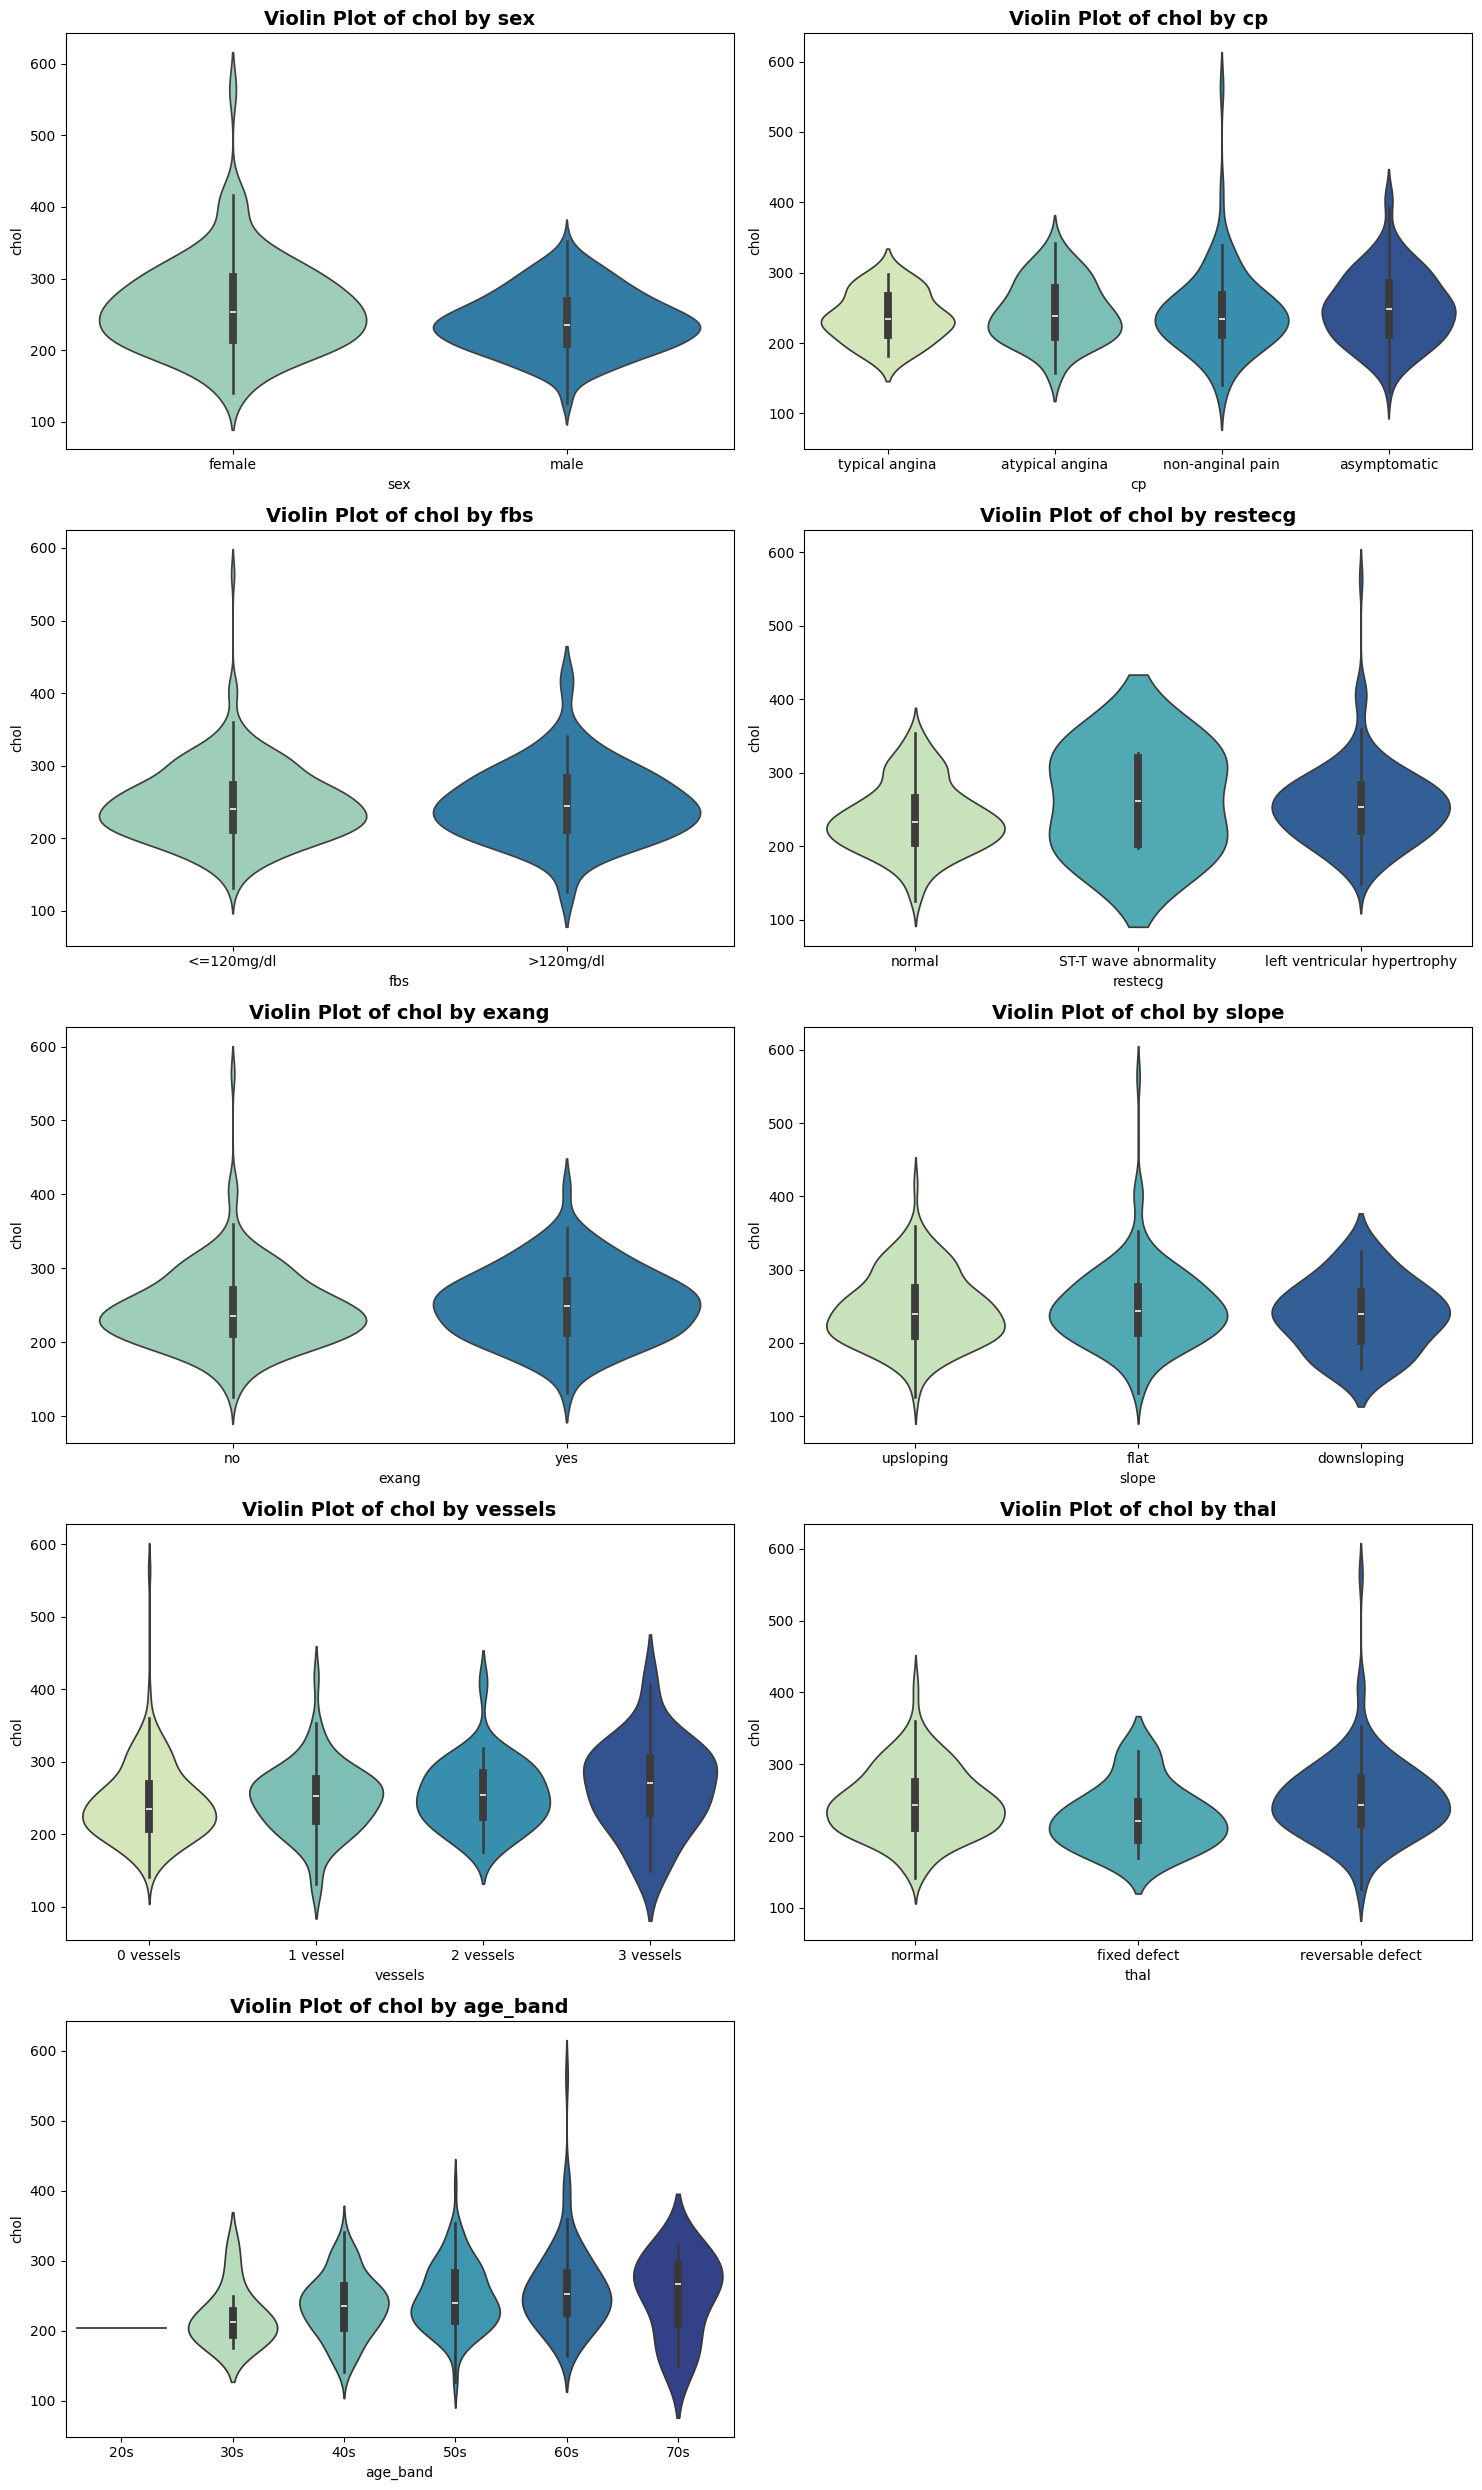

In [64]:
# Choose columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'age_band']
numeric_columns = ['chol']
num_plots = len(categorical_columns) * len(numeric_columns)

# Calculate the number of rows needed for subplots, based on the number of plots
num_subplots_per_row = 2
num_rows = num_plots // num_subplots_per_row + (num_plots % num_subplots_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size accordingly

# Create a violin plot for each pair of categorical and numerical columns
plot_number = 1
for numeric_col in numeric_columns:
    for category_col in categorical_columns:
        plt.subplot(num_rows, num_subplots_per_row, plot_number)
        sns.violinplot(x=category_col, y=numeric_col, data=df, palette="YlGnBu")
        plt.title(f'Violin Plot of {numeric_col} by {category_col}', fontsize=14, fontweight="bold")
        plot_number += 1

plt.tight_layout()
plt.show()

From the violin plots depicting 'chol' (cholesterol levels) across the categories we can gain the following insights:

- **By Sex:** Cholesterol levels across genders show some variation in distribution, with females potentially having a slightly wider range of values, as indicated by the width of the violin plot.

- **By Chest Pain Type (Cp):** There are noticeable differences in cholesterol distributions across types of chest pain. Asymptomatic individuals show a wider range, which could indicate a less consistent relationship between cholesterol levels and the absence of chest pain symptoms.

- **By Fasting Blood Sugar (Fbs):** The cholesterol level distributions between individuals with fasting blood sugar <=120mg/dl and those with >120mg/dl show considerable overlap, suggesting that fasting blood sugar levels might not show a clear differentiation in cholesterol levels.

- **By Resting ECG (Restecg):** Variability in cholesterol levels is observed across different ECG results. The 'ST-T wave abnormality' group exhibits a wide distribution, possibly indicating a varied cholesterol profile in this group.

- **By Exercise Induced Angina (Exang):** The distribution of cholesterol levels for individuals experiencing exercise-induced angina shows a slightly higher median compared to those who do not experience it, as well as a broader spread.

- **By Slope of the Peak Exercise ST Segment (Slope):** Individuals with a 'downsloping' ST segment show a different cholesterol distribution compared to those with 'upsloping' or 'flat' slopes.

- **By Number of Major Vessels (Vessels):** Cholesterol levels tend to vary more widely in individuals with a higher number of vessels colored by fluoroscopy, particularly for those with '3 vessels'.

- **By Thalassemia (Thal):** Cholesterol distributions vary with the type of thalassemia. 'Reversible defect' shows a distinctly different pattern from 'normal' and 'fixed defect', with some higher cholesterol levels indicated by vertical spread and outliers.

- **By Age Band:** Cholesterol distributions across age bands indicate differences, particularly with the '70s' age band showing a wider spread and higher median levels, which might suggest an increase in cholesterol with age.

##### **Resting Blood Pressure**

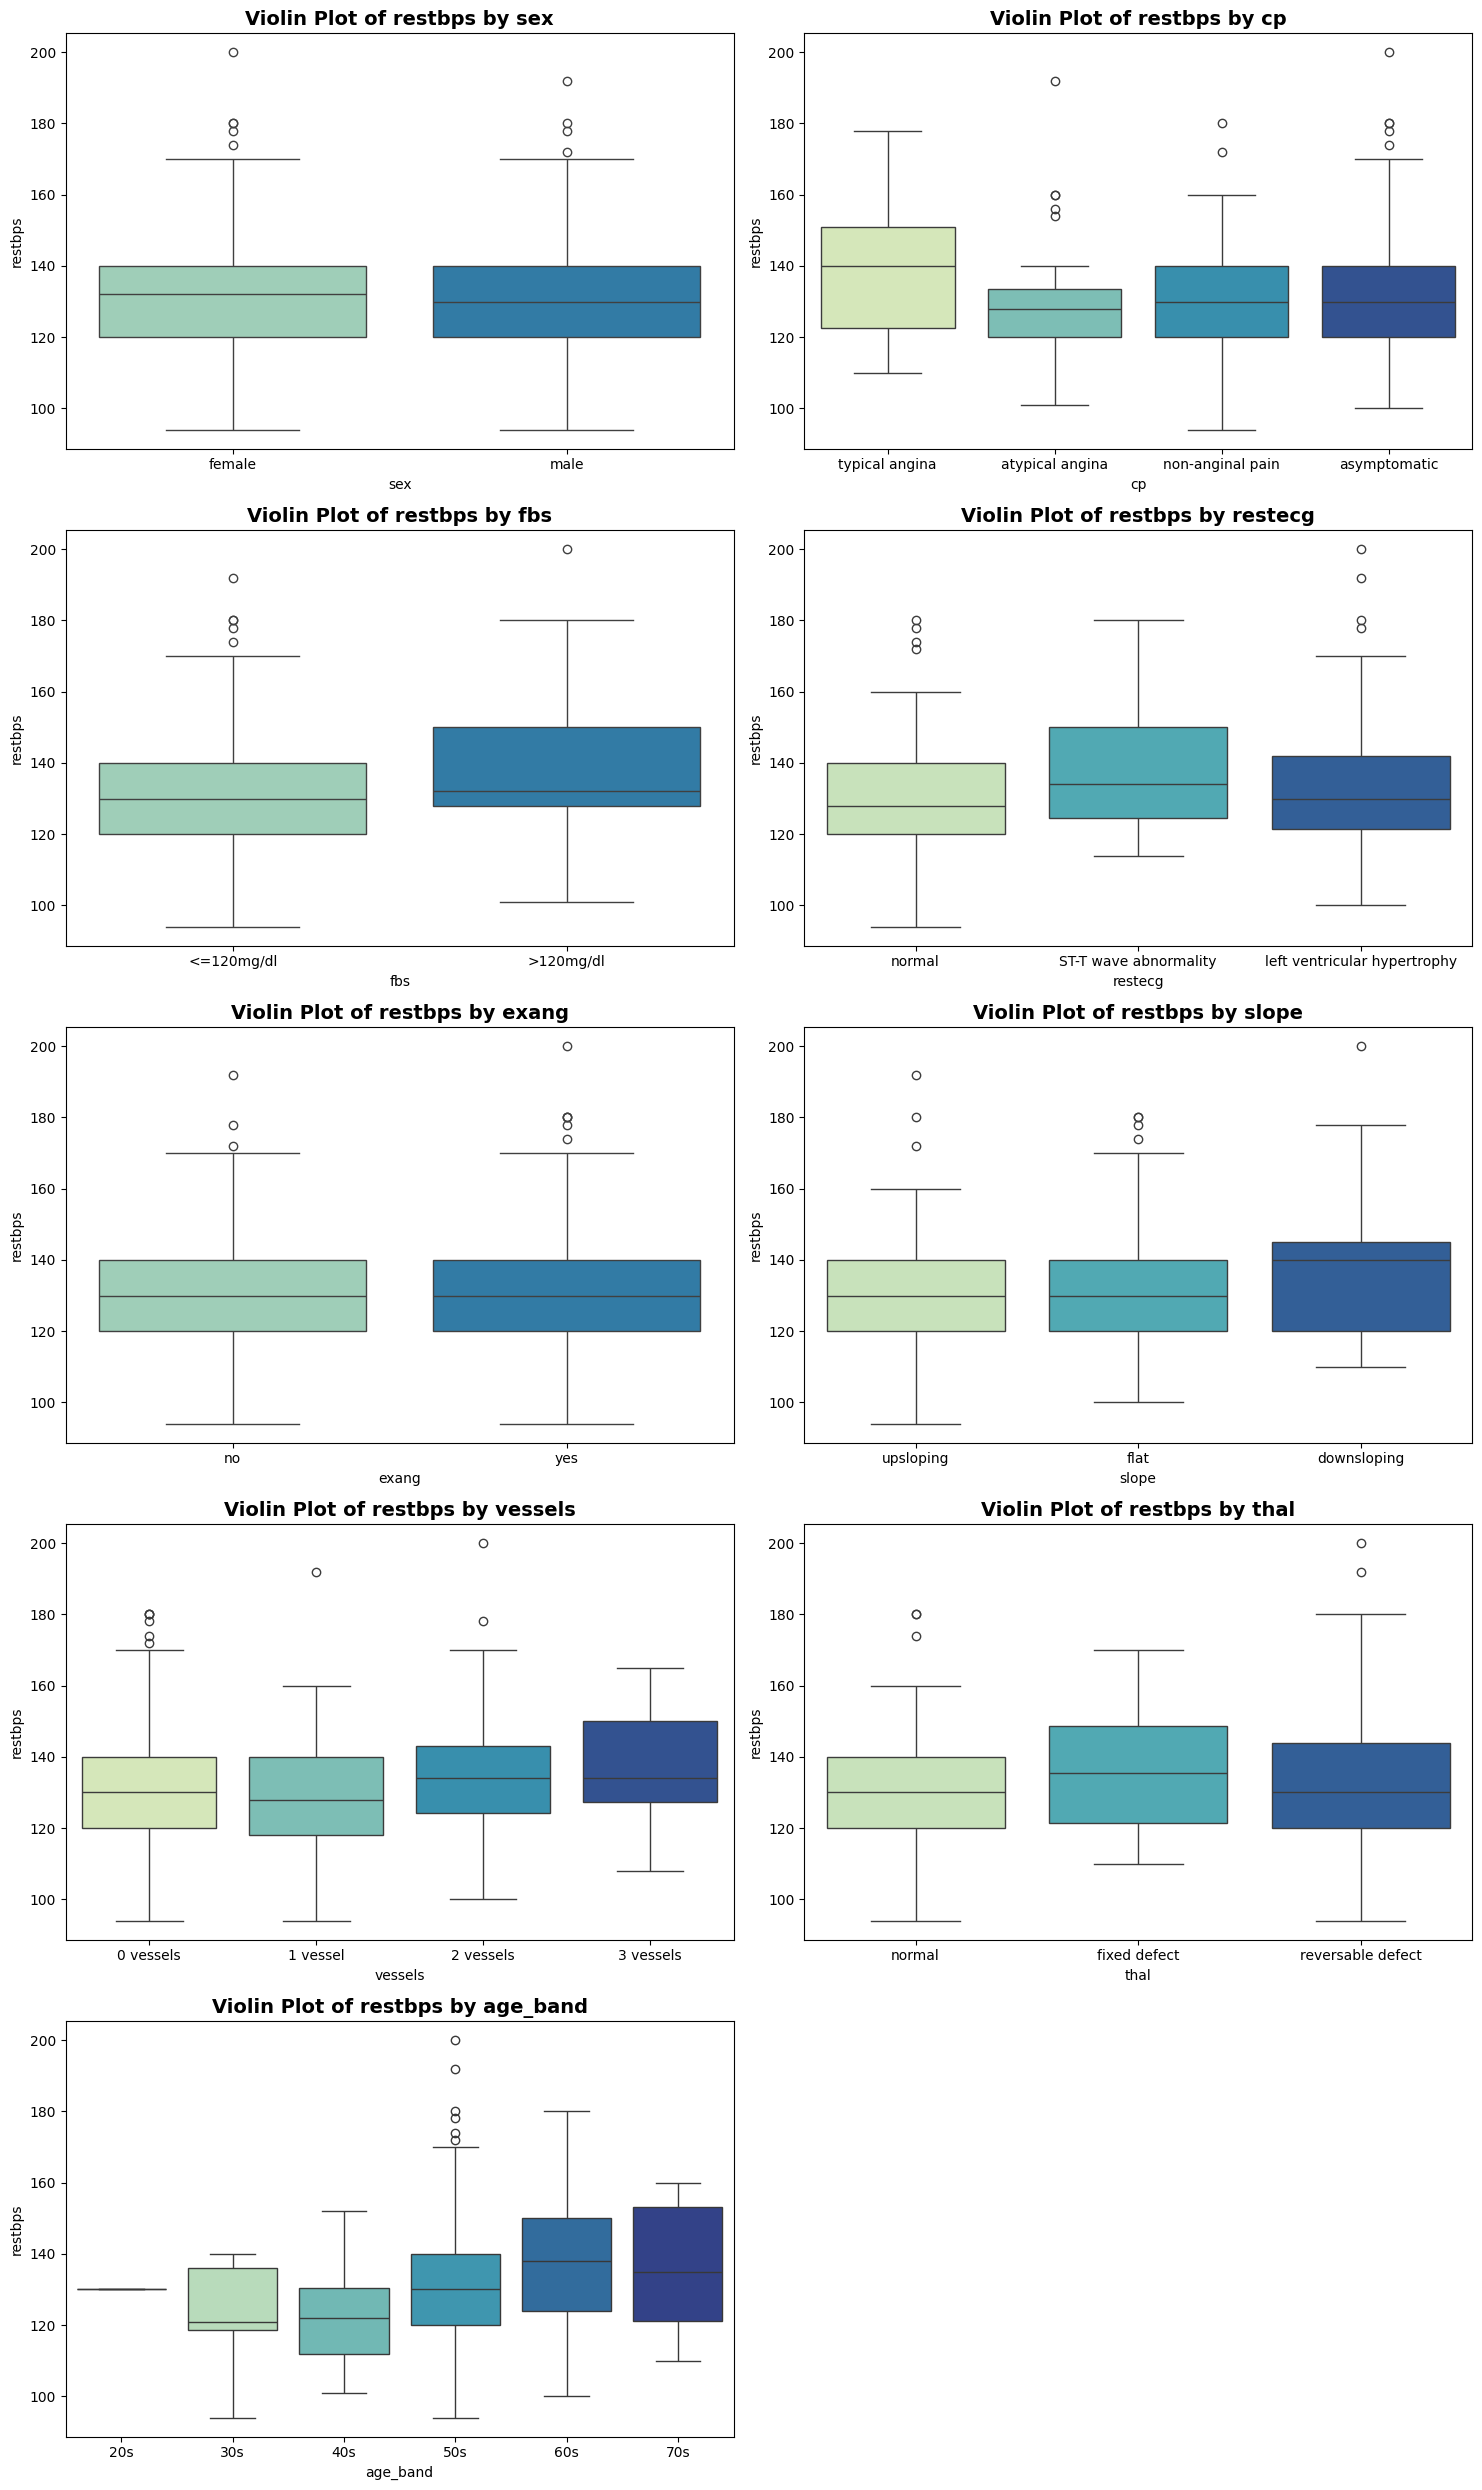

In [65]:
# Choose columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'age_band']
numeric_columns = ['restbps']
num_plots = len(categorical_columns) * len(numeric_columns)

# Calculate the number of rows needed for subplots, based on the number of plots
num_subplots_per_row = 2
num_rows = num_plots // num_subplots_per_row + (num_plots % num_subplots_per_row > 0)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size accordingly

# Create a violin plot for each pair of categorical and numerical columns
plot_number = 1
for numeric_col in numeric_columns:
    for category_col in categorical_columns:
        plt.subplot(num_rows, num_subplots_per_row, plot_number)
        sns.boxplot(x=category_col, y=numeric_col, data=df, palette="YlGnBu")
        plt.title(f'Violin Plot of {numeric_col} by {category_col}', fontsize=14, fontweight="bold")
        plot_number += 1

plt.tight_layout()
plt.show()

The violin plots for 'restbps' (resting blood pressure) across various categories reveal the following patterns:

- **By Sex:** Males and females show overlapping distributions of resting blood pressure, suggesting no significant difference between the sexes in this dataset.

- **By Chest Pain Type (Cp):** Resting blood pressure distributions across chest pain types do not show substantial variation, indicating that 'restbps' may not differ significantly with the type of chest pain experienced.

- **By Fasting Blood Sugar (Fbs):** The distributions are similar between individuals with fasting blood sugar below and above 120 mg/dl, suggesting no clear influence of fasting blood sugar on resting blood pressure within this dataset.

- **By Resting ECG (Restecg):** There's some variability in resting blood pressure across different ECG results, with the 'left ventricular hypertrophy' category potentially having a slightly higher median blood pressure.

- **By Exercise Induced Angina (Exang):** Individuals with exercise-induced angina show a similar distribution of resting blood pressure to those without, with the former potentially having a higher median.

- **By Slope of the Peak Exercise ST Segment (Slope):** The 'downsloping' category shows a higher variability in resting blood pressure compared to 'upsloping' and 'flat' slopes.

- **By Number of Major Vessels (Vessels):** The variability in resting blood pressure appears to increase with the number of colored vessels, which could indicate a relation between vascular health and blood pressure.

- **By Thalassemia (Thal):** Different types of thalassemia show overlapping distributions for resting blood pressure, but the 'reversible defect' category has a slightly wider range.

- **By Age Band:** There is an upward trend in both median resting blood pressure and variability as age increases, particularly noticeable in the 60s and 70s age bands.

##### **Thalach**

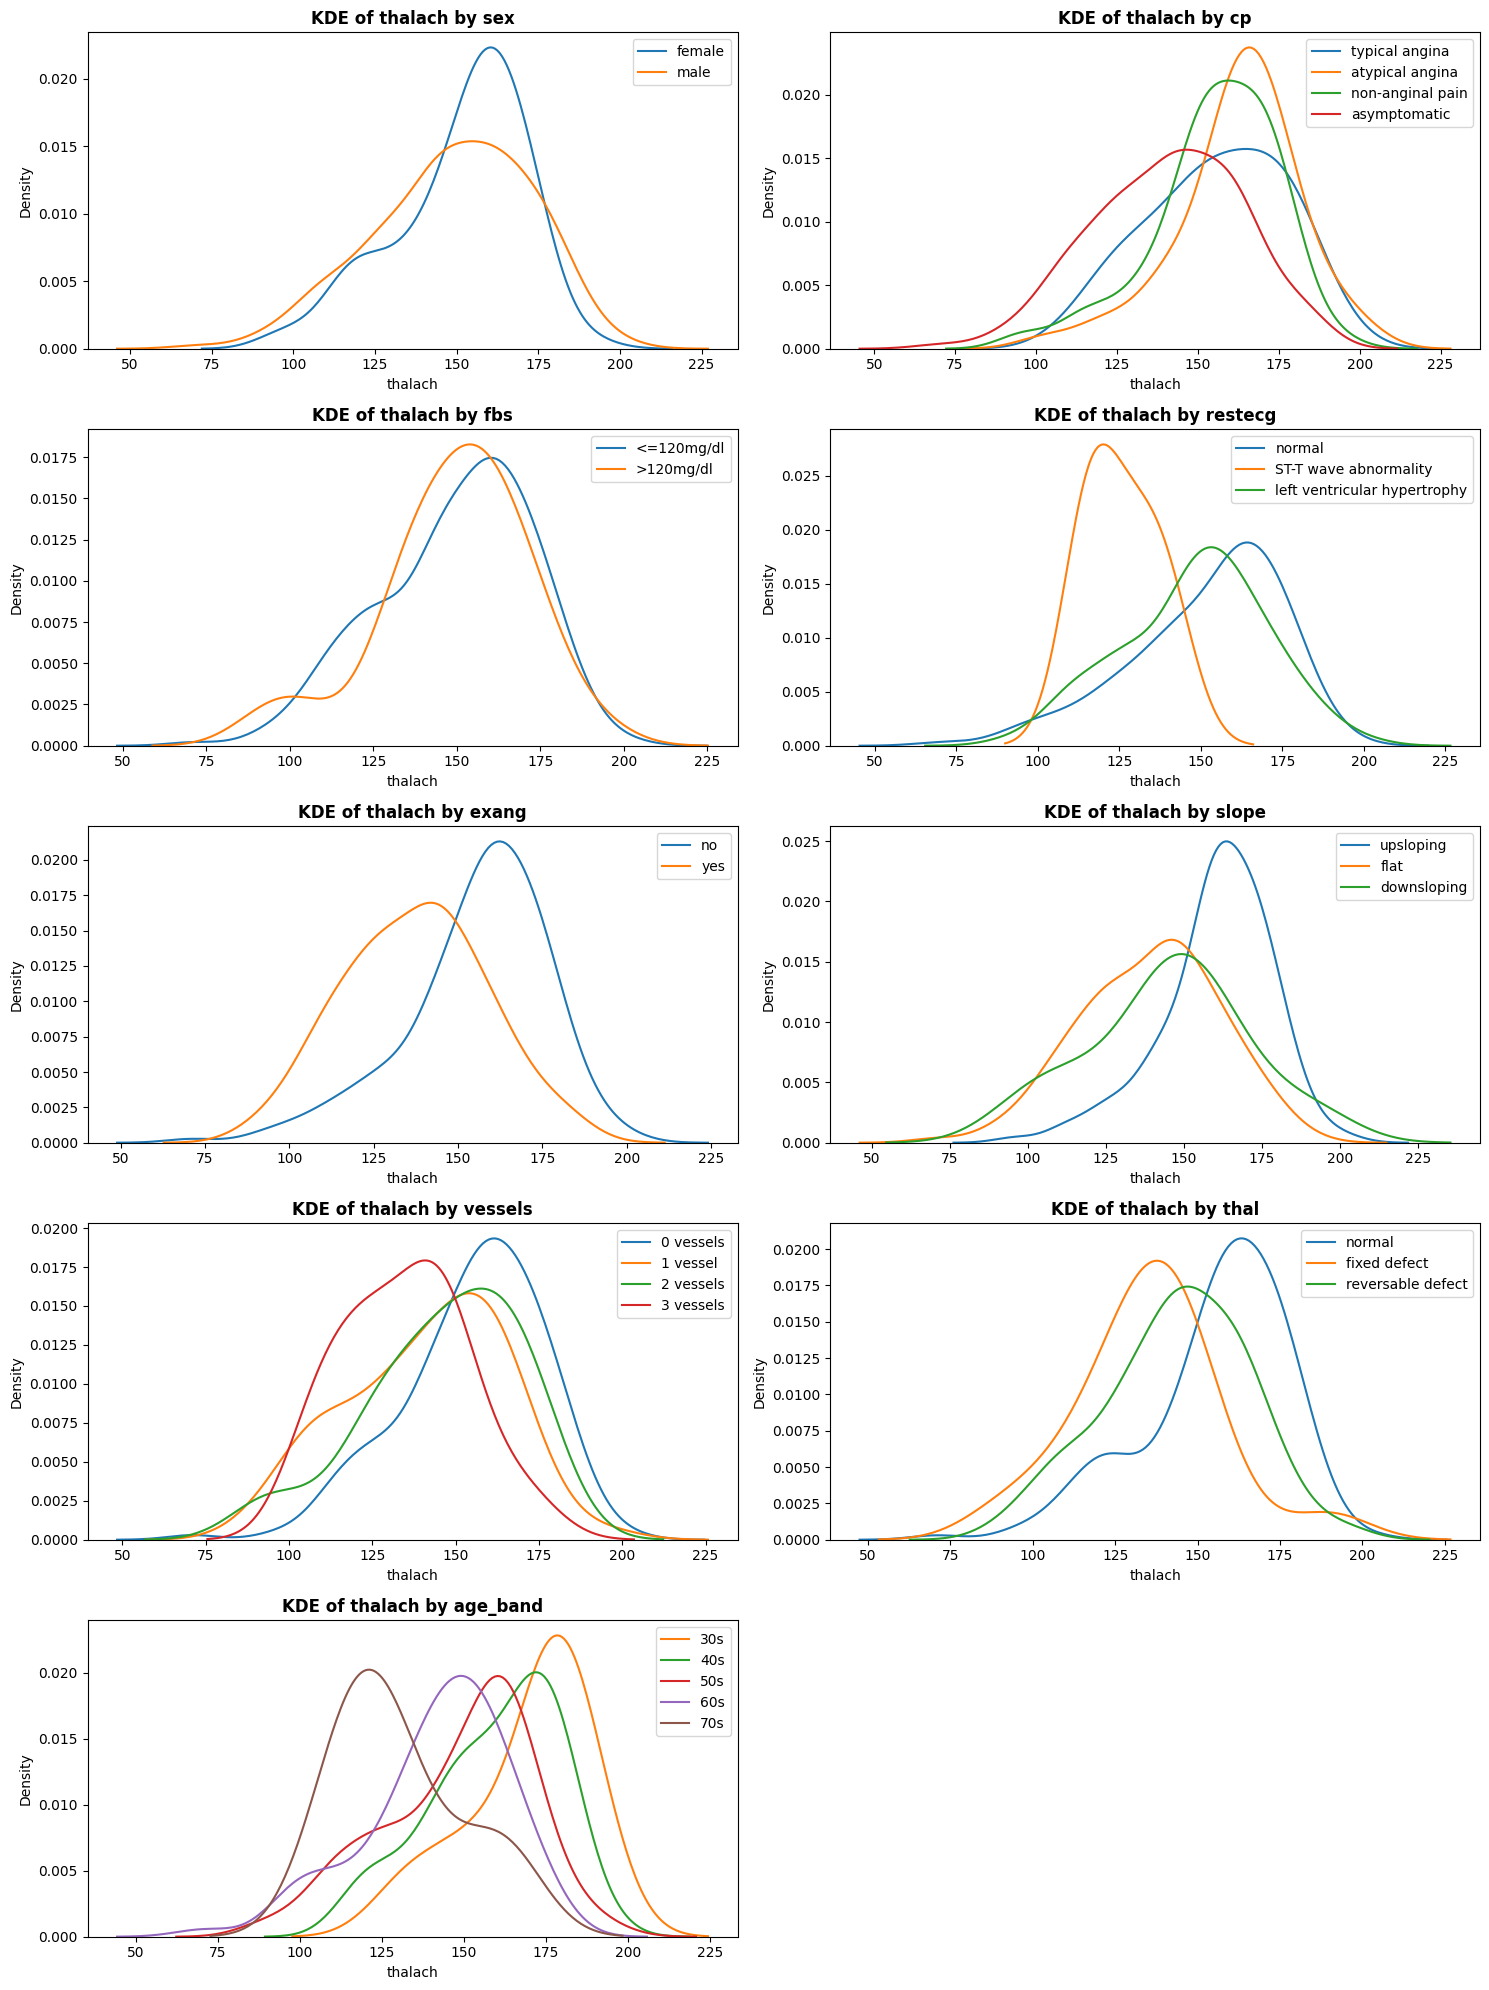

In [66]:
# Select columns to plot
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'age_band']
numeric_columns = ['thalach']  # Only one numeric column specified for KDE plot

# Calculate the number of rows needed for subplots
num_subplots_per_row = 2
num_rows = len(categorical_columns) // num_subplots_per_row + (len(categorical_columns) % num_subplots_per_row > 0)

# Create figure for subplots
plt.figure(figsize=(15, 4 * num_rows))

# Create a KDE plot for each categorical variable against the numerical variable
for i, category_col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_subplots_per_row, i + 1)
    for category in df[category_col].cat.categories:
        # Select the subset of the data corresponding to the current category
        subset = df[df[category_col] == category]
        # Plot the KDE for the numeric column
        sns.kdeplot(subset[numeric_columns[0]], label=str(category))
    plt.title(f'KDE of {numeric_columns[0]} by {category_col}', fontweight="bold")
    plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

The Kernel Density Estimate (KDE) plots for 'thalach' (maximum heart rate achieved) indicate how this measure is distributed across various categories within the dataset:

- **Sex Differences:** Distinct peaks in KDE plots for males and females suggest potential physiological differences in maximum heart rate.

- **Chest Pain Type (Cp):** Variations in 'thalach' across chest pain types could reflect different cardiac responses to stress.

- **Fasting Blood Sugar (Fbs):** Clear differences in 'thalach' distributions between normal and elevated fasting blood sugar levels.

- **Resting ECG Results (Restecg):** The spread of 'thalach' varies with ECG results, which may be indicative of underlying cardiac conditions.

- **Exercise Induced Angina (Exang):** Exercise-induced angina appears to influence the distribution of maximum heart rates achieved.

- **Slope of Peak Exercise ST Segment (Slope):** Each slope category shows a distinct 'thalach' distribution, potentially linked to the heart's response to exercise.

- **Number of Colored Vessels (Vessels):** Differences in 'thalach' distribution with the number of vessels colored might be related to coronary artery condition.

- **Thalassemia Types (Thal):** Types of thalassemia exhibit unique 'thalach' profiles, underscoring the impact of this condition on cardiac function.

- **Age Bands:** Noticeable distribution shifts in 'thalach' among age groups, with a trend of lower maximum heart rates as age increases.


#### **Categorical-Categorical Relationships**

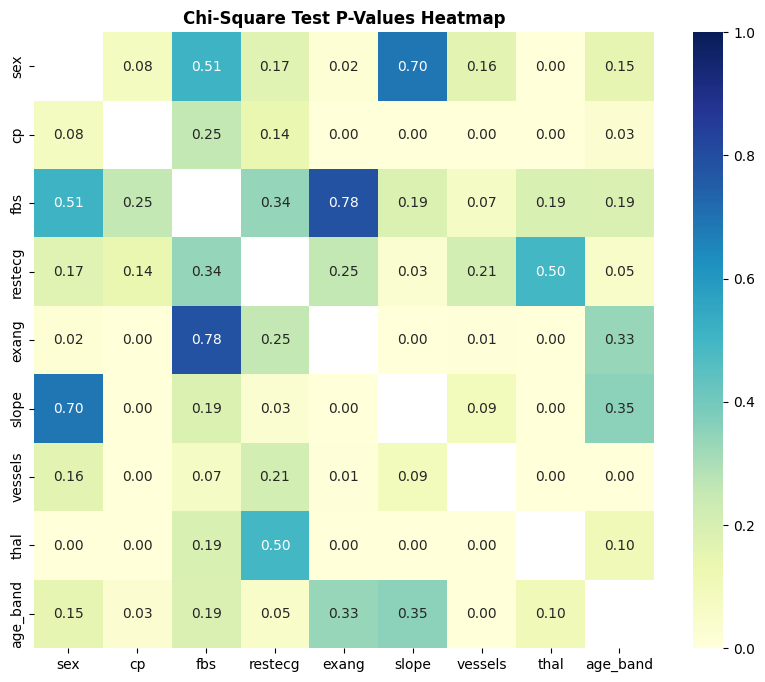

In [67]:
# List of categorical columns for the Chi-square test
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

# Initialize an empty DataFrame to store the Chi-square test results
chi2_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Perform Chi-square tests between all pairs of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a crosstab for the pair of variables
            crosstab = pd.crosstab(df[col1], df[col2])
            # Perform the Chi-square test
            chi2, p, dof, expected = chi2_contingency(crosstab)
            # Store the p-value in the results DataFrame
            chi2_results.at[col1, col2] = p
        else:
            # Fill the diagonal with NaNs
            chi2_results.at[col1, col2] = None

# Convert the results DataFrame to numeric (p-values are currently strings)
chi2_results = chi2_results.apply(pd.to_numeric)

# Plotting the heatmap of Chi-square test p-values
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0, vmax=1)
plt.title('Chi-Square Test P-Values Heatmap', fontweight="bold")
plt.show()


The p-value is a statistical measure that helps determine the significance of the association between two categorical variables. In the heatmap we see the p-values obtained from chi-square test of independence concerned between various features.

Here’s an interpretation of the heatmap:

- **Colors and Significance:** The color gradient ranges from green to blue, where green indicates a higher p-value (closer to 1) and blue indicates a lower p-value (closer to 0). Generally, a p-value less than 0.05 is considered statistically significant, which suggests that there is a low probability that the observed association is due to chance.

- **Significant Associations:** Features like cp (chest pain type), thal (thallium stress test result), and slope (the slope of the peak exercise ST segment) show several statistically significant associations (p < 0.05, shown in blue) with other features, indicating that there could be a relationship between these and other factors in the context of heart disease. For example, cp and exang (exercise-induced angina) show a strong association, as do thal and restecg (resting electrocardiographic results), among others.

- **Less Significant Associations:** Some features, such as sex with itself (which is expected to be 1 and not indicative of anything), sex with fbs (fasting blood sugar), and sex with slope, show higher p-values (in green), suggesting that there might not be a strong association or that any observed association could be due to chance.

### **Target Variable Analysis**

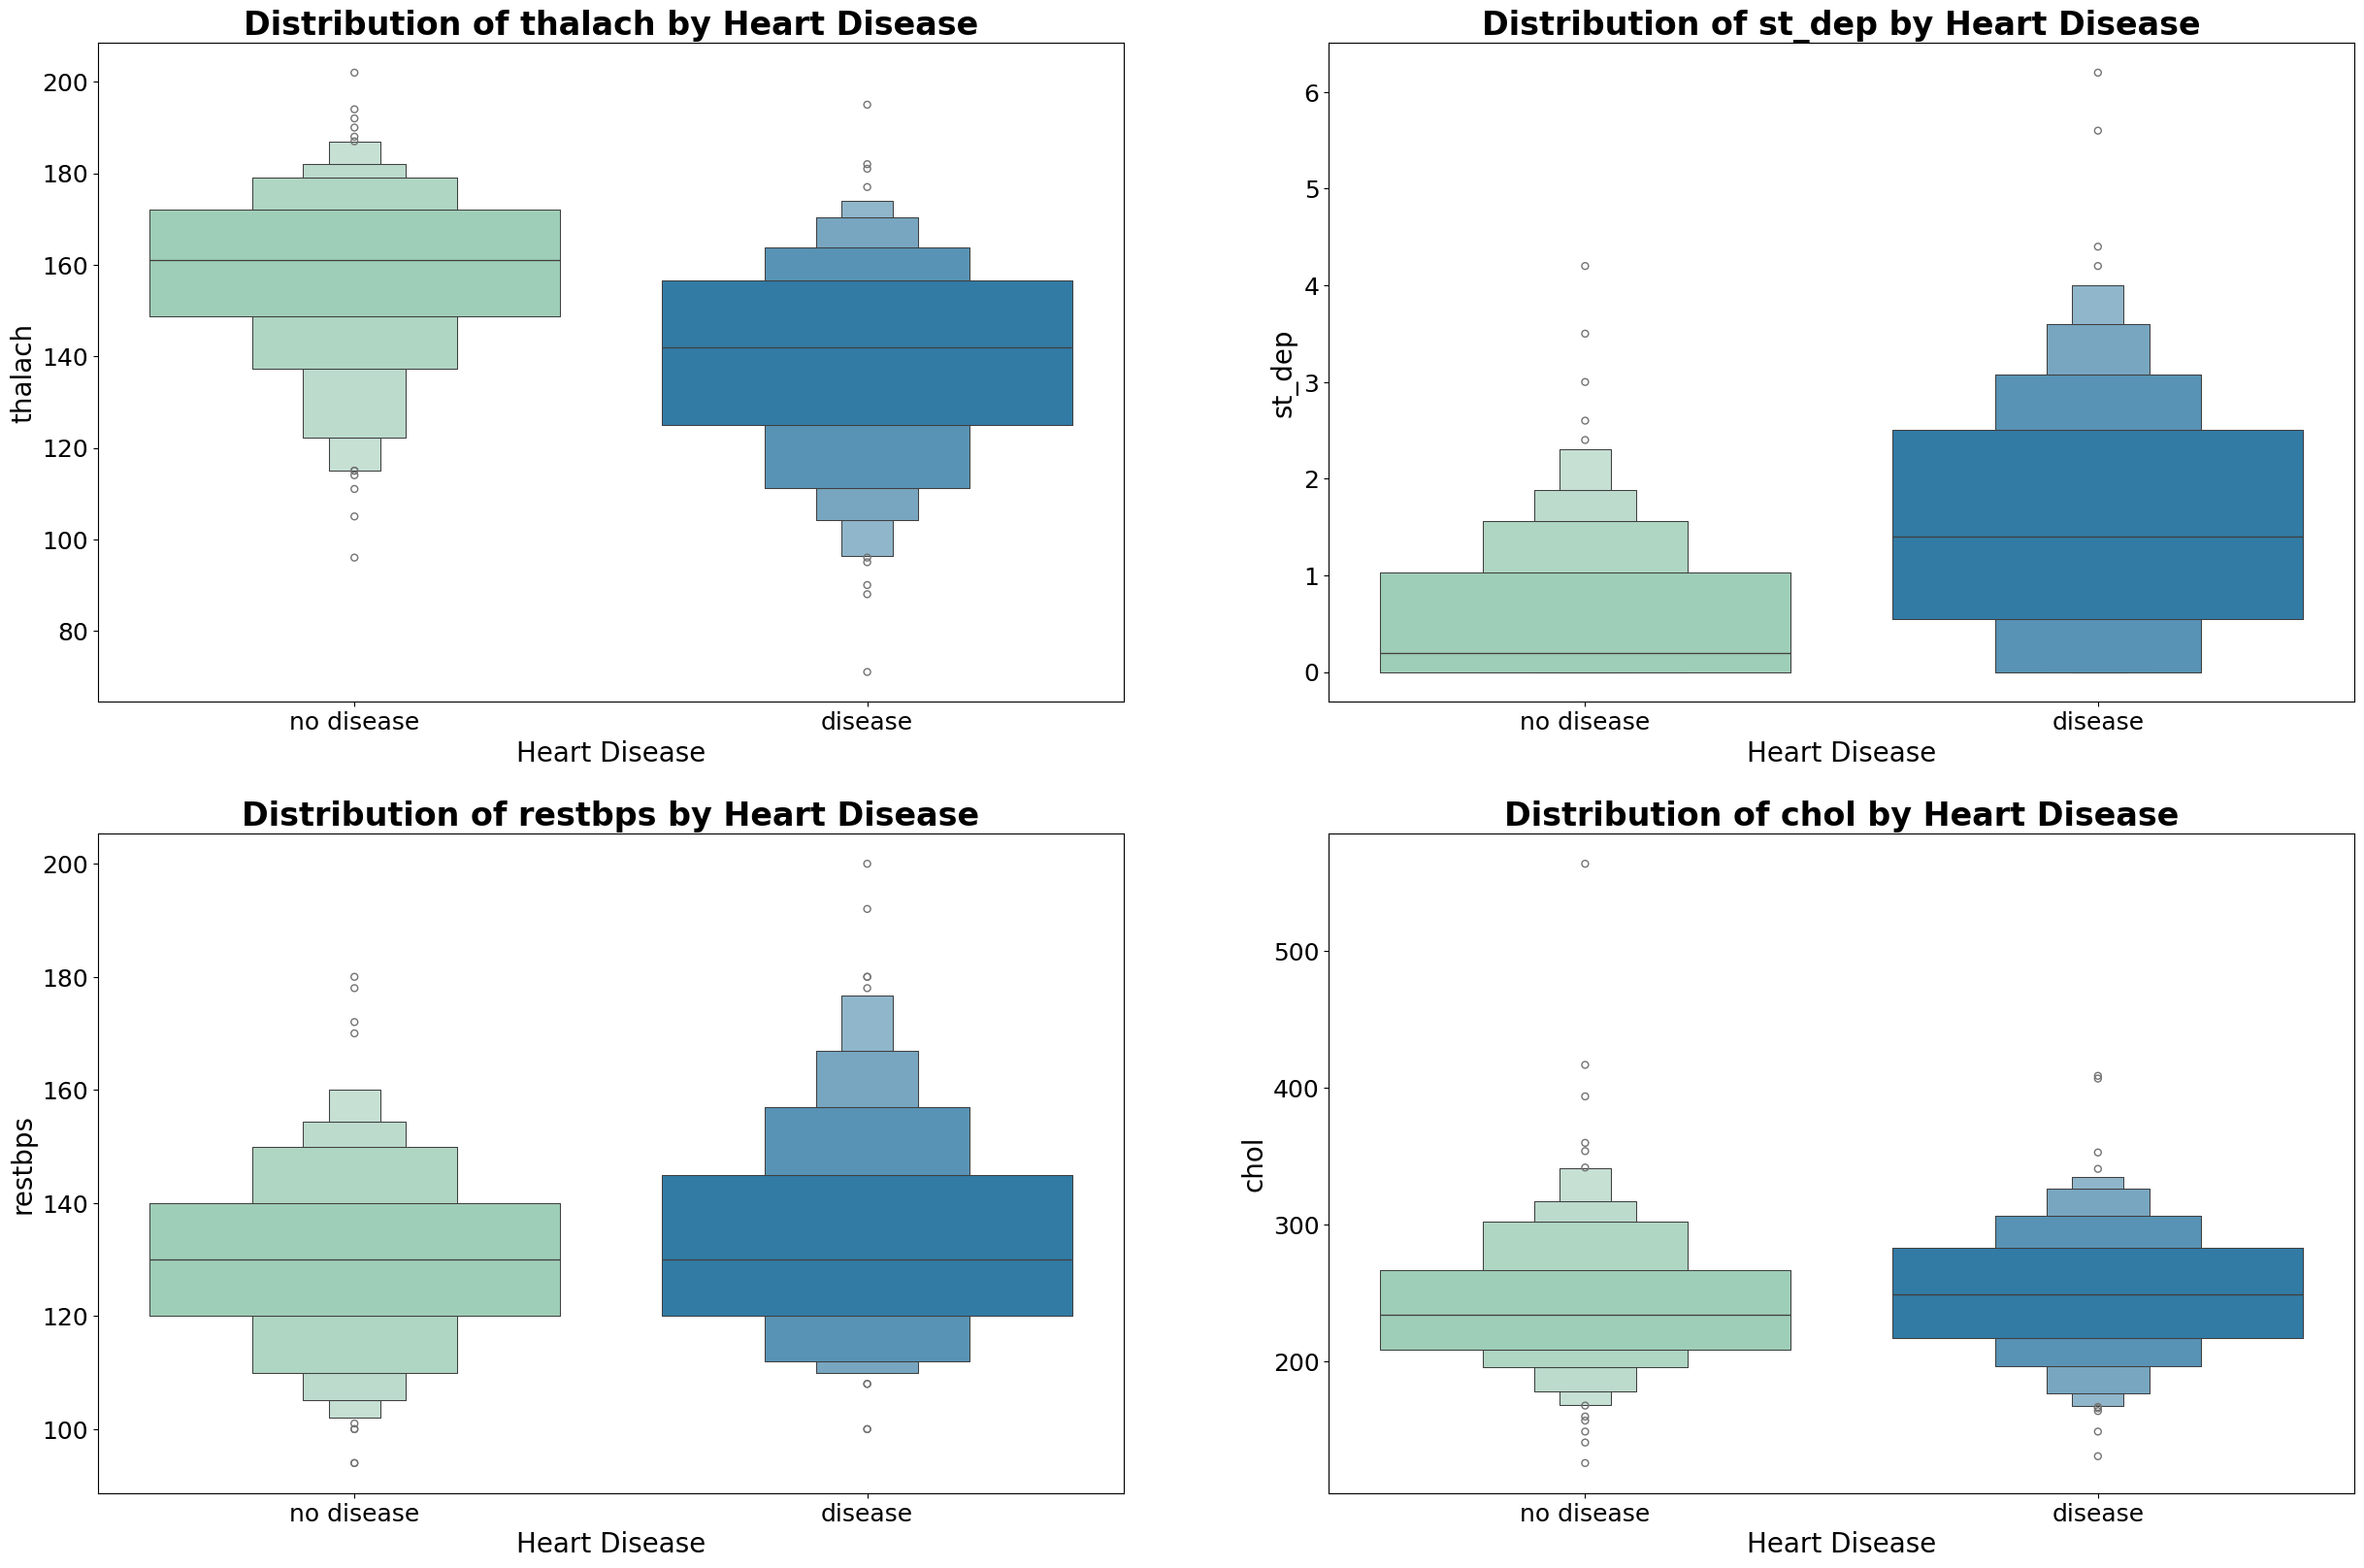

In [68]:
# Choose columns
numeric_columns = ['thalach', 'st_dep', 'restbps', 'chol']
num_subplots_per_row = 2

# Create boxenplots for each numerical column, split by the 'target' variable
plt.figure(figsize=(30, 30))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // num_subplots_per_row + 1, num_subplots_per_row, i + 1)
    sns.boxenplot(x='target', y=column, data=df, palette="YlGnBu")
    plt.title(f'Distribution of {column} by Heart Disease', fontweight="bold", fontsize=24)
    plt.xlabel('Heart Disease', fontsize=20)  # Set the font size for x-axis label
    plt.ylabel(column, fontsize=20)  # Set the font size for y-axis label
    plt.xticks(fontsize=18)  # Set the font size for x-axis ticks
    plt.yticks(fontsize=18)  # Set the font size for y-axis ticks
    
# Adjust the layout to give more space
    #plt.tight_layout(pad=0.4)  # Increase padding between figures
    # Adjust subplots spacing
    plt.subplots_adjust(hspace=0.2)  # Adjust horizontal space between rows

plt.show()

The boxplots provided offer a comparative view of different clinical measurements between individuals with and without heart disease.

- **Thalach: Maximum Heart Rate Achieved**
  - Heart Disease: Lower median thalach, with a broader interquartile range, indicating decreased maximum heart rate and increased variability among affected individuals.
  - No Disease: Higher median thalach with a narrower interquartile range, suggesting a better heart rate response during stress.

- **ST_Dep: ST Depression**
  - Heart Disease: Higher median ST depression, with values more spread out, which could signify more pronounced cardiac stress during exercise.
  - No Disease: Lower median ST depression, with less variability, indicative of less stress on the heart.

- **Restbps: Resting Blood Pressure**
  - Heart Disease: Slightly higher median resting blood pressure, although overall distributions between groups are similar.
  - No Disease: Slightly lower median resting blood pressure, with similar distribution.

- **Chol: Serum Cholesterol**
  - Heart Disease: Comparable median cholesterol levels to those without heart disease, but with a slightly wider interquartile range.
  - No Disease: Marginally tighter interquartile range, implying less variability in cholesterol levels among this group.

From these observations, thalach and ST depression stand out as potential indicators correlated with heart disease, whereas resting blood pressure and cholesterol levels do not show as marked a difference between the two groups.

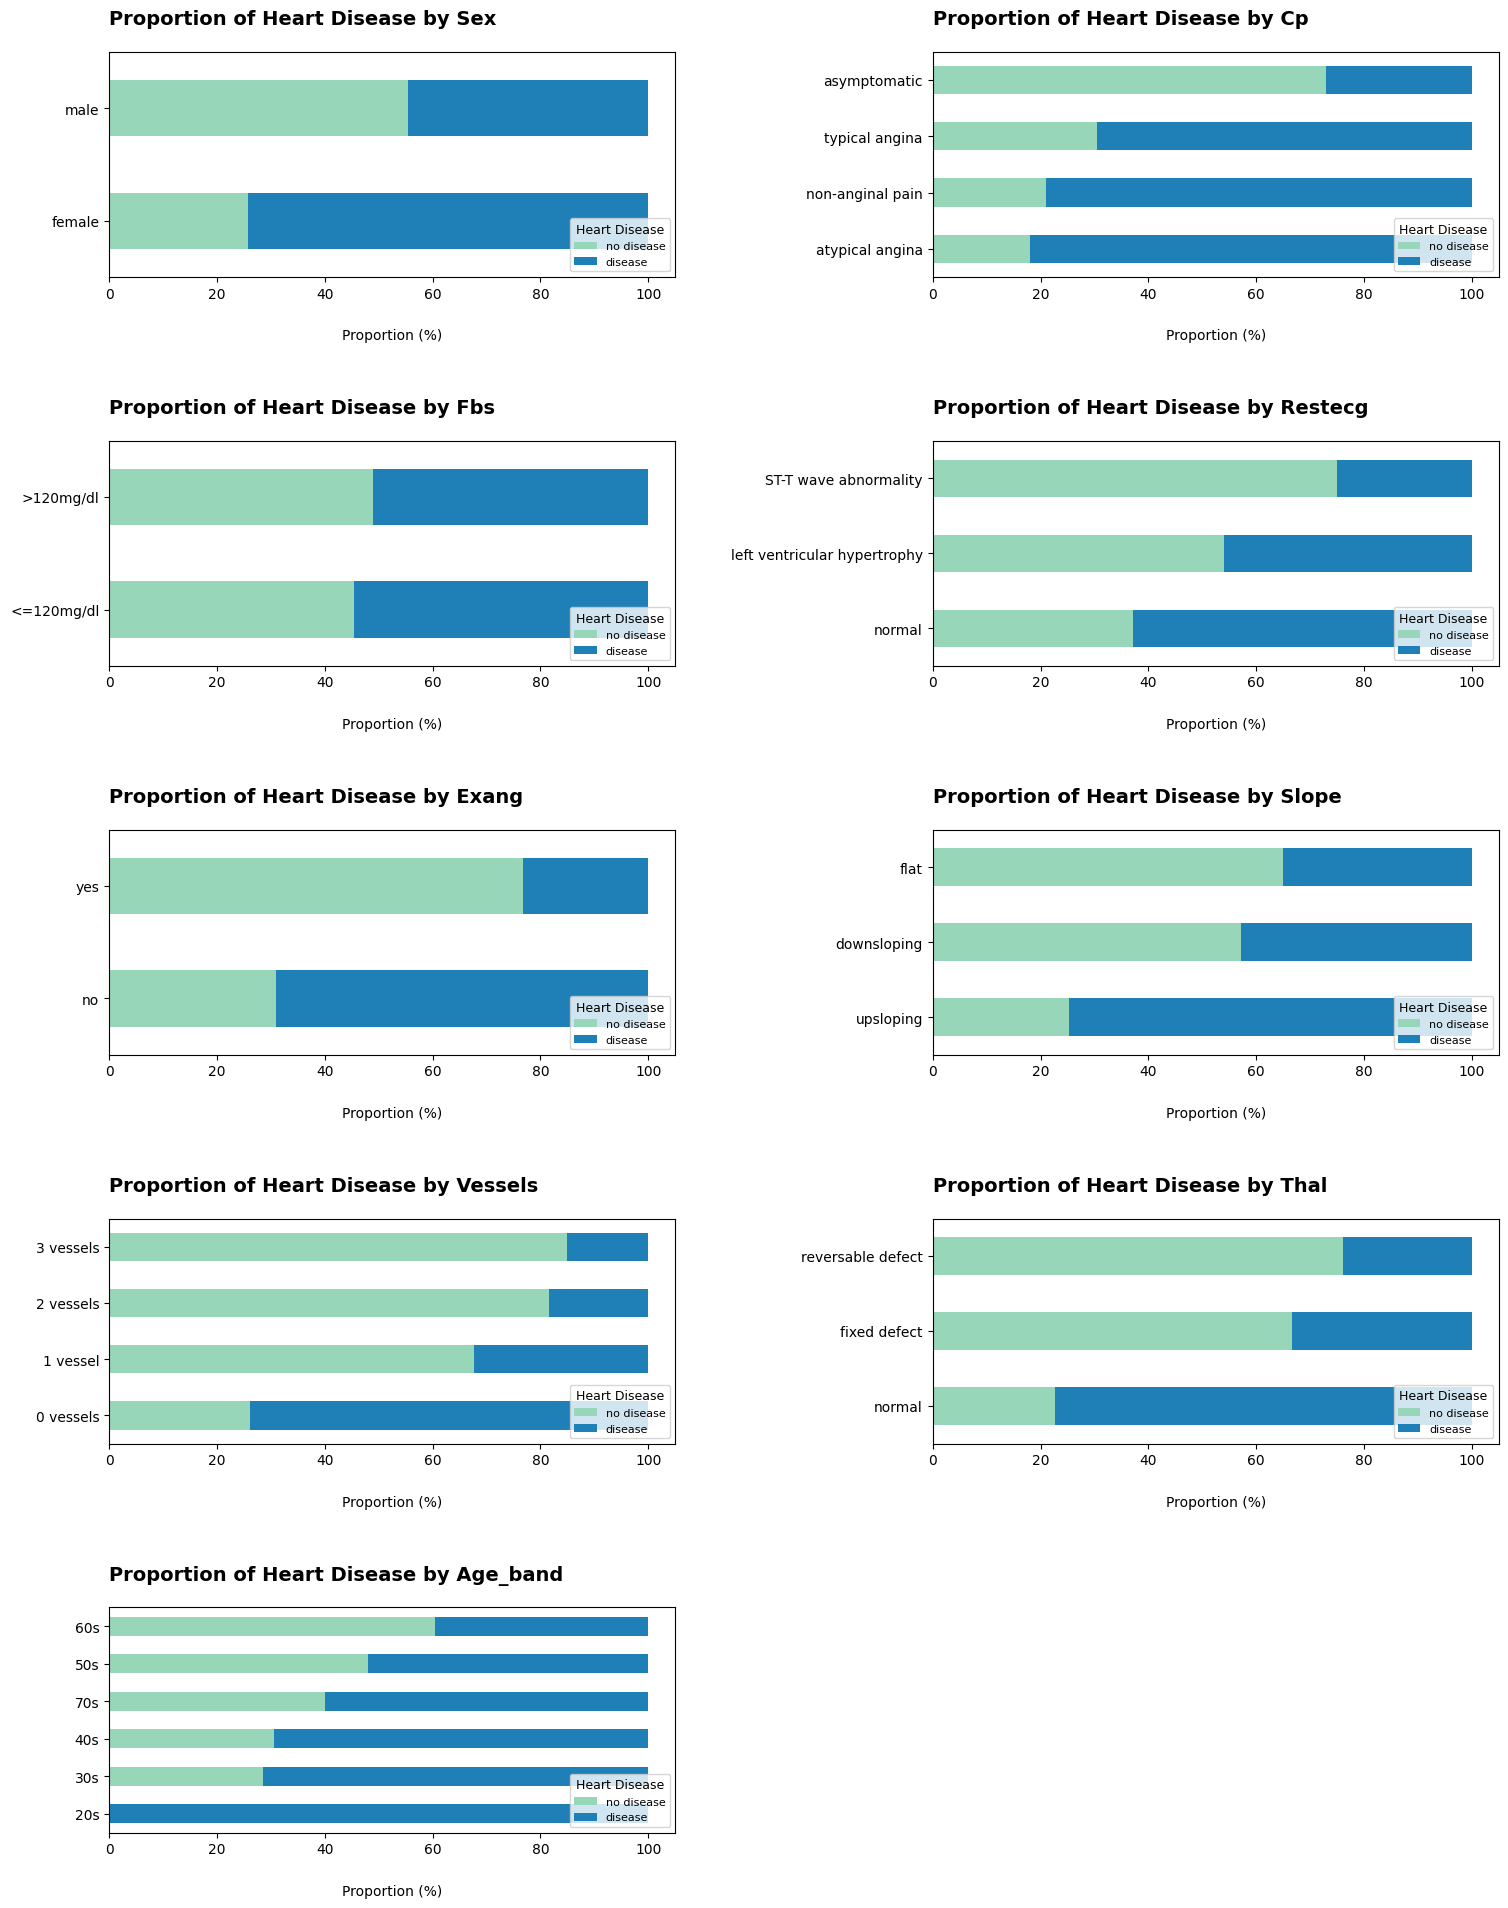

In [69]:
# Determine the number of rows needed for subplots, based on the number of categorical columns
rows = len(categorical_columns) // 2 + len(categorical_columns) % 2

# Prepare the figure and axes for subplots
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()  # Convert the axes to a 1D array for easier access

# Use the 'YlGnBu' color palette
palette = sns.color_palette("YlGnBu", n_colors=2)  # Ensure there are enough colors for 'no disease' and 'disease'

for i, column in enumerate(categorical_columns):
    # Create a cross-tabulation between the categorical column and the target variable
    crosstab = pd.crosstab(index=df[column], columns=df['target'], normalize='index') * 100
    
    # Sort the crosstab by 'disease' in descending order for visualization
    crosstab = crosstab.sort_values(by='disease', ascending=True)
    
    # Draw the horizontal stacked bar chart using the specified palette
    crosstab.plot(kind='barh', stacked=True, ax=axes[i], color=palette)
    
    # Set the labels and title, and adjust their size
    axes[i].set_title(f'Proportion of Heart Disease by {column.capitalize()}', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[i].set_ylabel("", fontsize=10, labelpad=20)
    axes[i].set_xlabel('Proportion (%)', fontsize=10, labelpad=20)
    
    # Adjust the legend: reduce its size and place it appropriately
    axes[i].legend(title='Heart Disease', labels=['no disease', 'disease'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

# Hide excess subplot axes if the number of categorical columns is odd
if len(categorical_columns) % 2 != 0:
    axes[-1].set_visible(False)

# Adjust the layout to give more space
plt.tight_layout(pad=4.0)  # Increase padding between figures
plt.show()


The stacked bar plots provide an overview of the prevalence of heart disease in relation to various categorical factors. Here's a detailed breakdown:

- **Sex:** The plots may indicate a gender disparity in heart disease rates, with potential implications for gender-specific health interventions.

- **Chest Pain Type (Cp):** Variations in heart disease rates among different types of chest pain could inform diagnostic criteria, with 'asymptomatic' individuals potentially at higher risk, emphasizing the need for comprehensive evaluations beyond symptomatic assessment.

- **Fasting Blood Sugar (Fbs):** The distribution suggests a relationship between elevated fasting blood sugar and heart disease, which could underscore the importance of glucose control in cardiovascular health.

- **Resting ECG (Restecg):** Significant differences in heart disease prevalence based on resting ECG results highlight the value of ECG as a diagnostic tool, particularly for detecting ST-T wave abnormalities and left ventricular hypertrophy.

- **Exercise Induced Angina (Exang):** The presence of exercise-induced angina is strongly associated with higher rates of heart disease, supporting its use as a critical indicator in stress testing.

- **Slope of the Peak Exercise ST Segment (Slope):** The type of slope during exercise correlates with heart disease presence, with 'downsloping' potentially serving as a marker for increased cardiovascular risk.

- **Number of Major Vessels (Vessels):** The clear trend showing higher heart disease rates with an increased number of colored vessels highlights the significance of coronary artery blockage as a risk factor for heart disease.

- **Thalassemia (Thal):** Different thalassemia types have varied associations with heart disease, with 'reversible defect' possibly linked to higher risk, which may influence treatment approaches.

- **Age Band:** The apparent increase in heart disease rates with age could reflect the cumulative effect of risk factors over time, emphasizing the need for early intervention strategies.

In summary, these visualizations underscore the multifactorial nature of heart disease and reinforce the importance of a multifaceted approach to its prediction, prevention, and management. They suggest that while some factors have a more pronounced relationship with heart disease, others may interact or contribute in less direct ways, highlighting areas for more in-depth study.


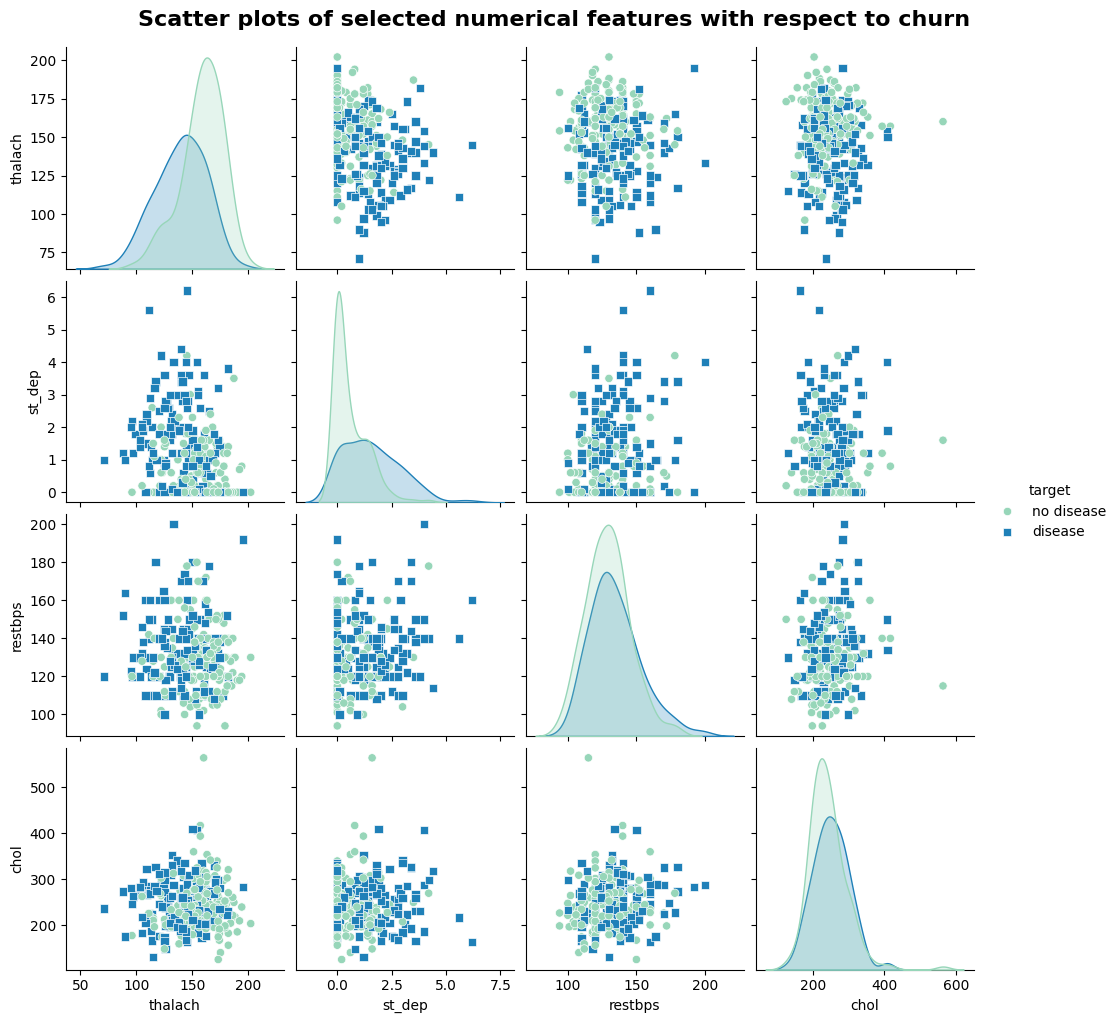

In [70]:
# List of numerical columns for analysis
int_fl_columns = [
    'thalach',
    'st_dep',
    'restbps',
    'chol'
]

# Create scatter plots for selected numerical features with respect to churn status
sns.pairplot(df, vars=int_fl_columns, hue='target', markers=['o', 's'], diag_kind='kde', palette="YlGnBu")

# Set the title of the overall figure
plt.suptitle('Scatter plots of selected numerical features with respect to churn', y=1.02, fontsize=16, fontweight="bold")

# Display the resulting plots
plt.show()

These scatter plots compare the distribution of four numerical features between individuals with and without heart disease:

- **Thalach (Maximum Heart Rate Achieved):** There's a noticeable difference in the distribution of thalach values between the two groups. Individuals with no heart disease tend to have higher maximum heart rates, and the distribution of their heart rates is denser at the higher end of the scale.

- **ST_Dep (ST Depression):** Individuals with heart disease often have higher ST depression during exercise, indicated by the cluster of points higher on the y-axis for the 'disease' group.

- **Restbps (Resting Blood Pressure):** Both groups show a wide range of resting blood pressure values, but there doesn't seem to be a clear division between the groups.

- **Chol (Serum Cholesterol):** Cholesterol levels are widely spread for both groups, with a large overlap in values between those with and without heart disease.

The visualization suggests that while cholesterol and resting blood pressure levels are not distinctly different between the groups, maximum heart rate and exercise-induced ST depression could be more indicative of heart disease status.

## **Modeling**

In the quest to advance our understanding of heart disease, the forthcoming phase of our analysis will be dedicated to modeling. We aim to explore a variety of machine learning models to ascertain which can most accurately and reliably predict the presence of heart disease. Our approach will be to start with traditional methods such as logistic regression and Naive Bayes, which have long-standing reputations for effectiveness in medical statistics.

Further, we plan to delve into more sophisticated ensemble techniques like RandomForest and XGBoost, as well as the fundamental Decision Tree approach, to harness their strengths in recognizing complex patterns within intricate datasets.

Each model offers distinct features and assumptions that could prove beneficial for predicting heart disease, or alternatively, may present specific challenges due to the nature of our data.

Once we have evaluated and compared the performance of these models using key metrics—including accuracy, precision, recall, and the F1-score—we will select the model that demonstrates the best baseline performance. This chosen model will undergo a rigorous optimization process, employing hyperparameter tuning methods to enhance its predictive capabilities to the fullest extent.

The culmination of this meticulous process is to establish a robust and dependable model that could serve as a valuable tool for predicting heart disease in clinical settings.

### **Prepocessing**

In [71]:
# Replace 'disease' with 1 and 'no disease' with 0 in the 'target' column
df['target'] = df['target'].replace({'disease': 1, 'no disease': 0})

# Check the first few rows to ensure the conversion was successful
#print(df['target'].head())


In [72]:
# Defining the columns to scale
columns_to_scale = ['restbps', 'chol', 'thalach', 'st_dep']

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the data and transforming the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Selecting features and target variable
X = df.drop('target', axis=1)
y = df['target']

# One-Hot-Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Functions**

In [73]:
# Create a dataframe to store metrics
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


In [74]:
def print_results(y_true, y_proba, y_pred, model_name, store_metrics=True):
    """
    Function to print evaluation results including metrics, confusion matrix, and classification report.

    Parameters:
        y_true (array-like): True labels.
        y_proba (array-like): Predicted probabilities.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model.
        store_metrics (bool, optional): Whether to store metrics in a DataFrame. Default is True.
    """
    global model_metrics  # Assumes `model_metrics` is defined somewhere globally

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_proba)  # Utilizing probabilities for calculation

    # Create or update metrics in DataFrame
    metrics = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
    if store_metrics:
        if model_name in model_metrics['Model'].values:
            model_metrics.loc[model_metrics['Model'] == model_name, list(metrics.keys())] = list(metrics.values())
        else:
            new_row = {'Model': model_name, **metrics}
            model_metrics = pd.concat([model_metrics, pd.DataFrame([new_row])], ignore_index=True)

    # Visualize Confusion Matrix and Classification Report side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', cmap='YlGnBu', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix for {model_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Classification Report
    report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).iloc[:-1, :].T
    sns.heatmap(report, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', ax=axes[1])
    axes[1].set_title(f'Classification Report for {model_name}')
    axes[1].set_xlabel('Metrics')
    axes[1].set_ylabel('Classes')
    
    plt.show()


In [75]:
def plot_feature_importance(model, preprocessor, numeric_features, categorical_features, model_name, palette='Blues_r'):
    """
    Function to plot feature importance for a given model.

    Parameters:
        model: Fitted model object.
        preprocessor: Preprocessor object.
        numeric_features (list): List of numeric feature names.
        categorical_features (list): List of categorical feature names.
        model_name (str): Name of the model.
        palette (str, optional): Color palette for the plot. Default is 'Blues_r'.
    """
    # Get column names after preprocessing
    numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

    # Display feature importances
    feature_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

    # Seaborn barplot with reversed order and specified color palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette=palette)
    plt.xlabel('Feature Importance', labelpad=20)
    plt.ylabel('Features', labelpad=20)
    plt.title(f'Feature Importance: {model_name}', fontsize=14, loc='left', fontweight='bold', pad=20)
    plt.show()

### **Logistic Regression**

Training Accuracy: 0.8719
Cross-Validation Scores: [0.81632653 0.87755102 0.77083333 0.85416667 0.875     ]
Average CV Score: 0.8388
ROC-AUC Score: 0.9256


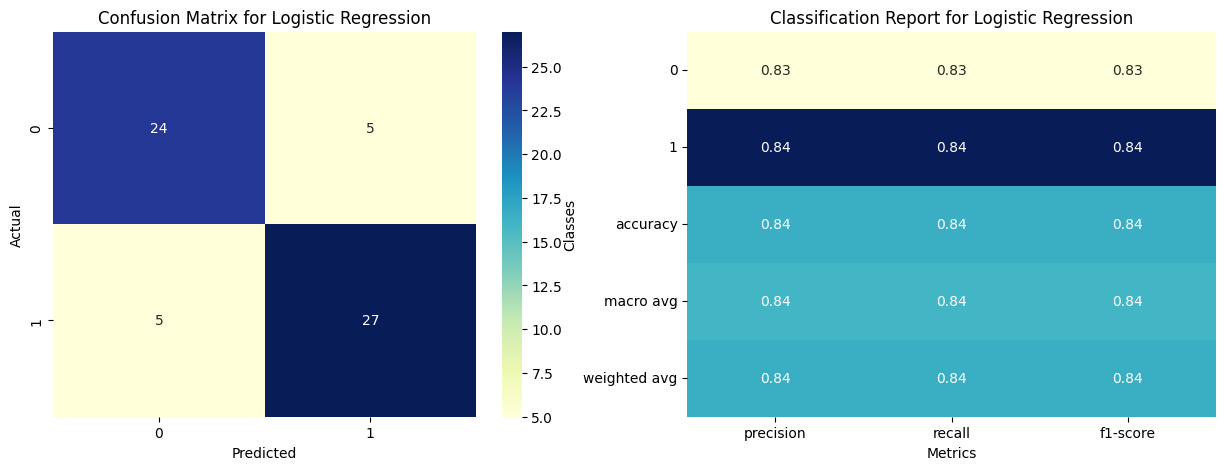

In [76]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# Calculate probabilities for the positive class on the validation data
y_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate training accuracy
y_train_pred = logreg.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

# Berechnen des ROC-AUC-Scores
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


# Using the function to print metrics and plot the confusion matrix and classification report
print_results(y_test, y_proba, y_pred, "Logistic Regression")



The model shows a good predictive performance for heart disease with a high training accuracy and robust cross-validation scores.

The cross-validation scores show some variance, ranging from about 77% to 87.75%. However, all scores are relatively high, which suggests the model generalizes well to unseen data.

The average cross-validation score is 0.8388, or approximately 83.88%, which is slightly lower than the training accuracy. This is common and may indicate that the model fits the training data slightly better than it generalizes, but not to a degree that would suggest severe overfitting.

The balanced false positives and false negatives, along with consistent precision, recall, and F1-scores, suggest that the model is reliable for both classes.

### **Naive Bayes**

Training Accuracy: 0.8099
Cross-Validation Scores: [0.71428571 0.7755102  0.77083333 0.85416667 0.77083333]
Average CV Score: 0.7771
ROC-AUC Score: 0.8599


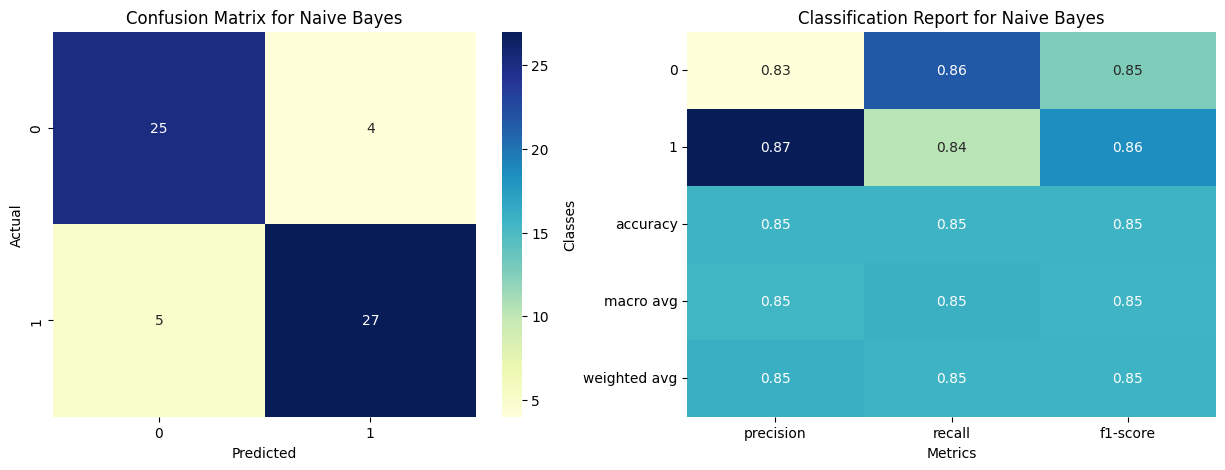

In [77]:
# Create naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Vorhersage und Bewertung
y_pred = nb_model.predict(X_test)

# Calculate probabilities for the positive class on the validation data
y_proba = nb_model.predict_proba(X_test)[:, 1]

# Calculate training accuracy
y_train_pred = nb_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

# calculate roc-auc
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

print_results(y_test, y_proba, y_pred, 'Naive Bayes')


The Naive Bayes model has a respectable predictive performance but is not quite as accurate or stable as the logistic regression model, based on the cross-validation scores.

The scores vary from about 71% to 85%, showing a wider spread than the logistic regression model, which could indicate less stability or potential overfitting.

The average cross-validation score is 0.7771, which is about 3% lower than the logistic regression model.

The model has a balanced performance across precision, recall, and F1-score, with a slightly better recall for the negative class.

### **Random Forest**

Training Accuracy: 1.0000
Cross-Validation Scores: [0.73469388 0.87755102 0.75       0.77083333 0.79166667]
Average CV Score: 0.7849
ROC-AUC Score: 0.9337


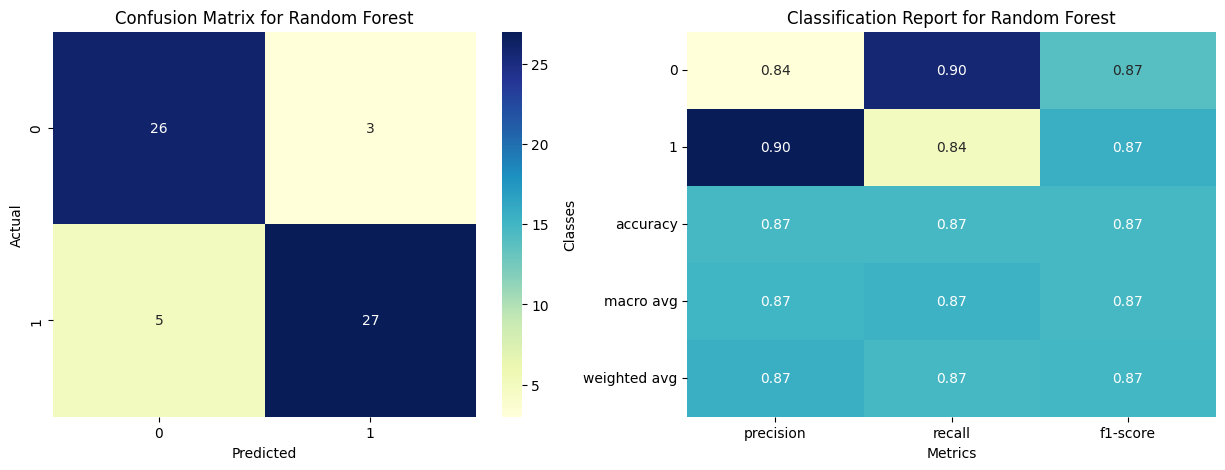

In [78]:
# Erstellen des RandomForest-Modells
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate probabilities for the positive class on the validation data
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Vorhersage und Bewertung
rf_pred = rf_model.predict(X_test)

# Calculate training accuracy
y_train_pred = rf_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

# Berechnen des ROC-AUC-Scores
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

print_results(y_test, y_proba, rf_pred, 'Random Forest')


The Random Forest model shows good performance on the training set but may be overfitted, as indicated by the perfect training accuracy and lower cross-validation scores.

The training accuracy is 1.0, or 100%, which indicates perfect performance on the training data. However, this perfect score often signals overfitting, meaning the model may not generalize as well to unseen data.

The cross-validation scores range from about 70.83% to 83.67%. The average cross-validation score is 0.7849, or approximately 78.49%. This is much lower than the training accuracy, reinforcing the suspicion of overfitting.

The variability in cross-validation scores suggests the model's performance is sensitive to the particular folds used during cross-validation.

The model is very reliable when it predicts the negative class but tends to miss more positive cases than the other models previously evaluated.

### **Decision Tree**

Training Accuracy: 1.0000
Cross-Validation Scores: [0.73469388 0.7755102  0.58333333 0.72916667 0.64583333]
Average CV Score: 0.6937
ROC-AUC Score: 0.8028


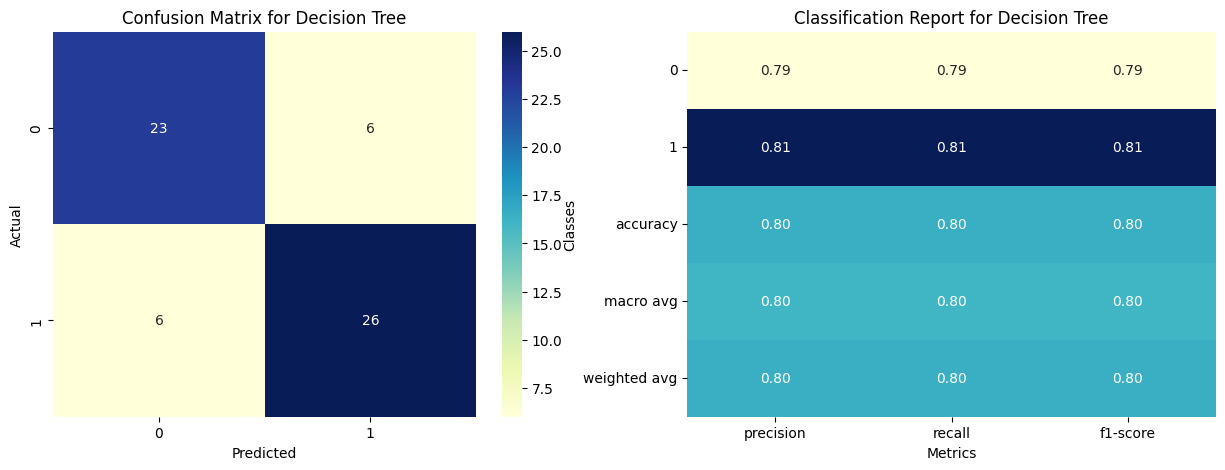

In [79]:
# Erstellen des DecisionTree-Modells
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Vorhersage und Bewertung
dt_pred = dt_model.predict(X_test)

# Calculate probabilities for the positive class on the validation data
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate training accuracy
y_train_pred = dt_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

# Berechnen des ROC-AUC-Scores
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

print_results(y_test, y_proba, dt_pred, 'Decision Tree')


The Decision Tree model shows clear signs of overfitting with perfect training accuracy but lower cross-validation scores.

The training accuracy is 1.0 or 100%, which suggests that the model has perfectly fit the training data. While this might seem ideal, it is often indicative of overfitting.

The cross-validation scores range from 58.33% to 75.51%. This significant variation and the notably lower average CV score of 69.40% compared to the training accuracy confirm that the model is overfitting the training data.

The lower average CV score indicates the model's generalization to unseen data is not as strong as its performance on the training set.

The balanced precision and F1-scores across both classes indicate a decent model, but the significant drop in performance during cross-validation suggests the model may not perform as well in real-world scenarios.

### **XGBoost**

Training Accuracy: 1.0000
Cross-Validation Scores: [0.71428571 0.81632653 0.75       0.77083333 0.77083333]
Average CV Score: 0.7645
ROC-AUC Score: 0.8933


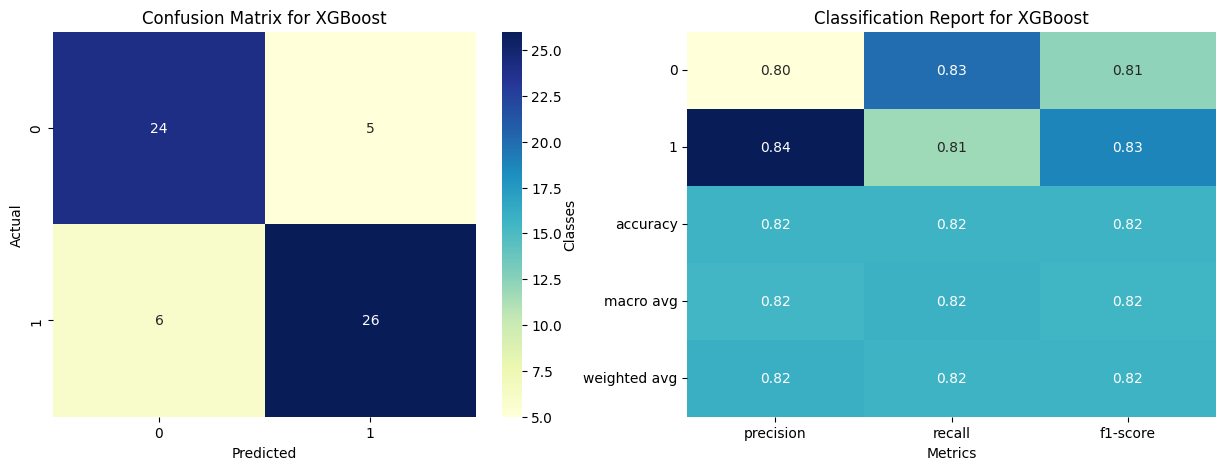

In [80]:
# Erstellen des XGBoost-Modells
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Vorhersage und Bewertung
xgb_pred = xgb_model.predict(X_test)

# Calculate probabilities for the positive class on the validation data
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate training accuracy
y_train_pred = xgb_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

# Berechnen des ROC-AUC-Scores
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

print_results(y_test, y_proba, xgb_pred, 'XGBoost')


The XGBoost model demonstrates strong performance metrics with good precision, recall, and F1-scores, indicating a balanced model.

There is evidence of overfitting, given the perfect training score and the drop in cross-validation scores, but the overfitting is not as severe as with the Decision Tree.

The training accuracy is perfect at 1.0 or 100%. As with any model showing perfect training accuracy, this raises concerns about overfitting.

The cross-validation scores range from 71.43% to 81.63%, with some variation but less extreme than the Decision Tree model.
The average cross-validation score is 76.45%, which is lower than the training accuracy, suggesting some overfitting, though not as pronounced as the Decision Tree.

The results are promising, but as with any model showing potential overfitting, caution should be taken, and further validation on an external dataset or through more extensive cross-validation might be beneficial.

### **Model Comparison**

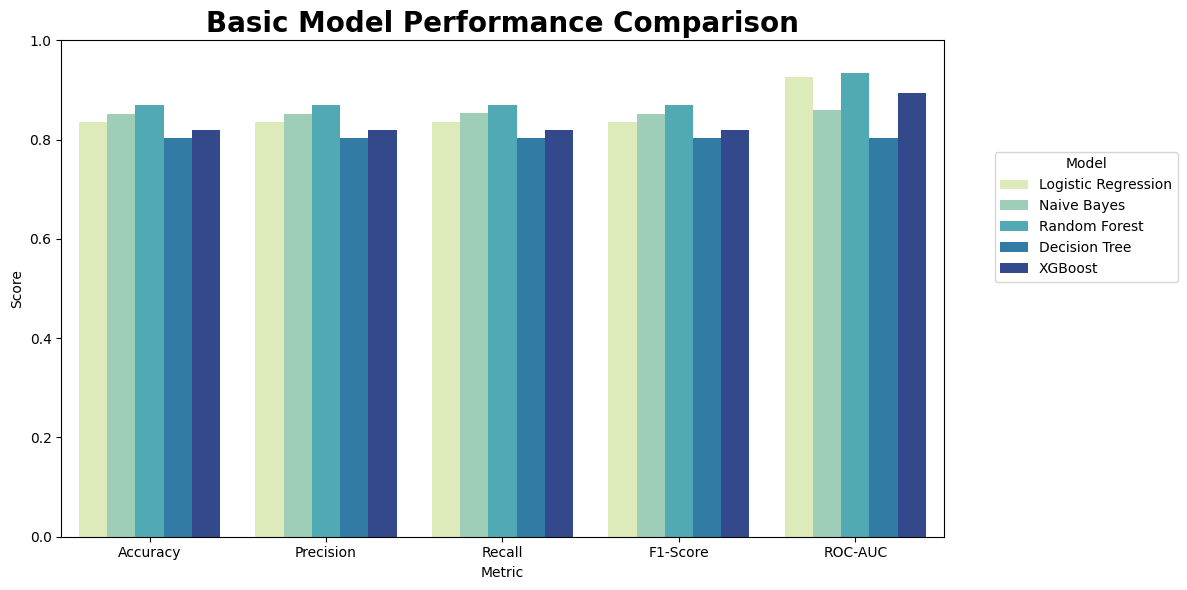

In [81]:
# Schmelzen des DataFrames, um es mit Seaborn's barplot kompatibel zu machen
melted_df = model_metrics.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Erstellen der Grafik
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Metric', y='Score', hue='Model', data=melted_df, palette="YlGnBu")
plt.title('Basic Model Performance Comparison', fontweight="bold", fontsize=20)
plt.ylabel('Score')
plt.ylim(0, 1)  # Optional, um die Y-Achse auf den Bereich von 0 bis 1 zu beschränken

# Legende unten rechts platzieren
plt.legend(title='Model', bbox_to_anchor=(1.05, 0.5), loc='lower left')

plt.tight_layout()
plt.show()

# Hervorheben der höchsten Werte in jeder Spalte (außer 'Model')
#def highlight_max(s):
#    '''
#    Hervorheben des maximalen Werts in einer Serie gelb.
#    '''
#    is_max = s == s.max()
#    return ['background-color: skyblue' if v else '' for v in is_max]

#styled_df = model_metrics.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
#styled_df


In the context of predicting heart diseases, the evaluation criteria for model selection can be quite stringent given the serious implications of false negatives and false positives:

- **False Negatives (Type II error)**: Missing a diagnosis of heart disease could be potentially life-threatening for patients who do not receive timely treatment.
- **False Positives (Type I error)**: While not as critical as false negatives, false positives can cause unnecessary stress for patients and may lead to additional tests that incur more costs and resources.

Considering the implications:

- **Recall** (Sensitivity) becomes an extremely important metric because it measures the model's ability to correctly identify all positive instances (i.e., patients with heart disease).
- **Precision** is also important as it measures the model's ability to not label negative instances (i.e., healthy patients) as positive.
- **ROC-AUC** is a good measure of how well the model can distinguish between classes, which is important in medical diagnostics.

Given these priorities, **Naive Bayes**, despite its simplicity, has one of the highest recall in the positive class, which is crucial for medical applications where missing a positive case can have serious consequences. However, the **ROC-AUC** of Naive Bayes is not as high as that of **Random Forest** or **XGBoost**, which indicates that it may not be as good at ranking predictions from most to least likely to be positive.

Between **Random Forest** and **XGBoost**, both have very high ROC-AUC scores. Given the complexity and potential of these models, and considering that they tend to perform well with imbalanced data (common in medical datasets), either could be a good candidate for hyperparameter tuning. **XGBoost**, in particular, is designed to optimize both bias and variance through gradient boosting, making it often a strong contender for achieving high performance in predictive tasks.

In summary, for predicting heart diseases where recall is crucial, hyperparameter tuning for **Naive Bayes** could be attempted to improve precision and ROC-AUC without sacrificing recall. However, given the robustness and potential of ensemble methods, **XGBoost** and **RandomForest** stand out as a prime candidates for extensive hyperparameter tuning. For instance, XGB  offers a combination of high performance and the ability to manage overfitting through regularization parameters, and it often achieves excellent results in practice after tuning. It's also computationally efficient and scalable.

Therefore, if resources allow, **XGBoost** and **RandomForest** should be considered for hyperparameter tuning first to maximize ROC-AUC while maintaining or improving recall.


### **Hyperparameter Tuning**
#### **XGBoost**
##### **GridSearch**

In [82]:
# Definieren Sie den Parameterbereich, den Sie durchsuchen möchten
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

# Initialisieren Sie den GridSearchCV-Objekt
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Führen Sie das Grid-Search-Tuning auf den Trainingsdaten aus
grid_search.fit(X_train, y_train)

# Drucken Sie die besten Parameter und den besten Score aus
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

# Verwenden Sie das beste Modell, um Vorhersagen zu treffen
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Berechnen Sie die Genauigkeit auf den Testdaten
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 9360 candidates, totalling 46800 fits


Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 160, 'subsample': 0.8}
Best CV Score: 0.8306122448979592
Test Accuracy: 0.8525


Optimized Training Accuracy: 0.9298


Optimized Cross-Validation Scores: [0.7755102  0.87755102 0.79166667 0.83333333 0.875     ]
Optimized Average CV Score: 0.8306
ROC-AUC Score: 0.9321


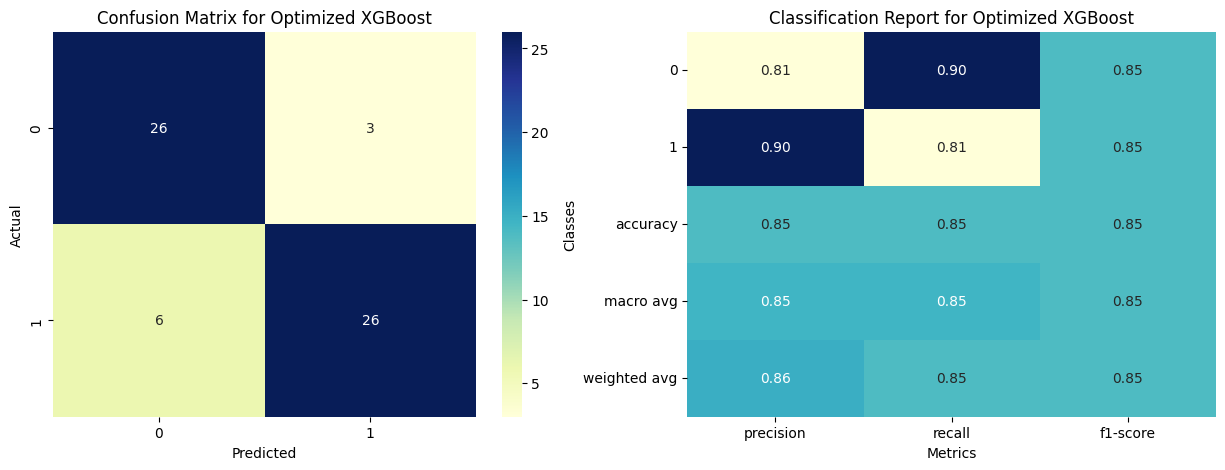

In [83]:
# Create the XGBoost model with the best parameters found from GridSearchCV
xgb_optimized_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=0.3,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=160,
    subsample=0.8,
    random_state=42
)

# Fit the optimized model to the training data
xgb_optimized_model.fit(X_train, y_train)

# Make predictions with the optimized model
xgb_opt_pred = xgb_optimized_model.predict(X_test)

# Calculate probabilities for the positive class with the optimized model
y_opt_proba = xgb_optimized_model.predict_proba(X_test)[:, 1]

# Calculate training accuracy with the optimized model
y_train_opt_pred = xgb_optimized_model.predict(X_train)
training_opt_accuracy = accuracy_score(y_train, y_train_opt_pred)
print(f"Optimized Training Accuracy: {training_opt_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores for the optimized model
cv_opt_scores = cross_val_score(xgb_optimized_model, X_train, y_train, cv=5)

print(f"Optimized Cross-Validation Scores: {cv_opt_scores}")
print(f"Optimized Average CV Score: {cv_opt_scores.mean():.4f}")

# calculate roc-auc
roc_auc = roc_auc_score(y_test, y_opt_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Print results
print_results(y_test, y_opt_proba, xgb_opt_pred, 'Optimized XGBoost')

The provided results for the optimized XGBoost model offer a detailed look at its performance in predicting heart disease:

- **Training Accuracy:** The model achieves a high training accuracy of 92.98%, suggesting it fits the training data well. While this is generally positive, it's significantly higher than the cross-validation scores, hinting at potential overfitting.

- **Cross-Validation Scores:** The cross-validation scores, ranging from 77.55% to 87.75%, with an average of 83.06%, indicate good predictive performance on unseen data. However, the variation across folds suggests that the model's performance may fluctuate depending on the specific subset of data it's being validated against.

- **Confusion Matrix:** With 26 true positives and 26 true negatives, the model seems balanced in its ability to correctly classify both classes. However, there are 6 false negatives and 3 false positives, which in a medical context, could mean it's slightly more prone to missing cases of disease (false negatives) than incorrectly diagnosing it (false positives). In medical diagnosis, a higher false-negative rate could be more concerning than false positives.

- **Classification Report:** The model has an overall accuracy of 85% on the test data, which is high and suggests good predictive power. The precision for predicting the positive class (disease presence) is 0.90, indicating that when the model predicts heart disease, it's correct 90% of the time. The recall for the positive class is slightly lower at 0.81, meaning that it captures 81% of all actual disease cases. Both precision and recall are balanced, as reflected in the F1-scores of 0.85 for both classes, denoting a harmonious balance between precision and recall.

Overall, the model displays a strong capacity to predict heart disease, with solid scores across major performance metrics. However, the slightly higher rate of false negatives compared to false positives is something to consider, especially in a clinical setting where missing a diagnosis could have serious implications. The model's performance could potentially be improved further by addressing overfitting, perhaps by adjusting hyperparameters or by incorporating additional data or features that could help reduce false negatives.

##### **Fine Tuning**

Optimized Training Accuracy: 0.9008


Optimized Cross-Validation Scores: [0.7755102  0.81632653 0.75       0.8125     0.83333333]
Optimized Average CV Score: 0.7975
ROC-AUC Score: 0.9353


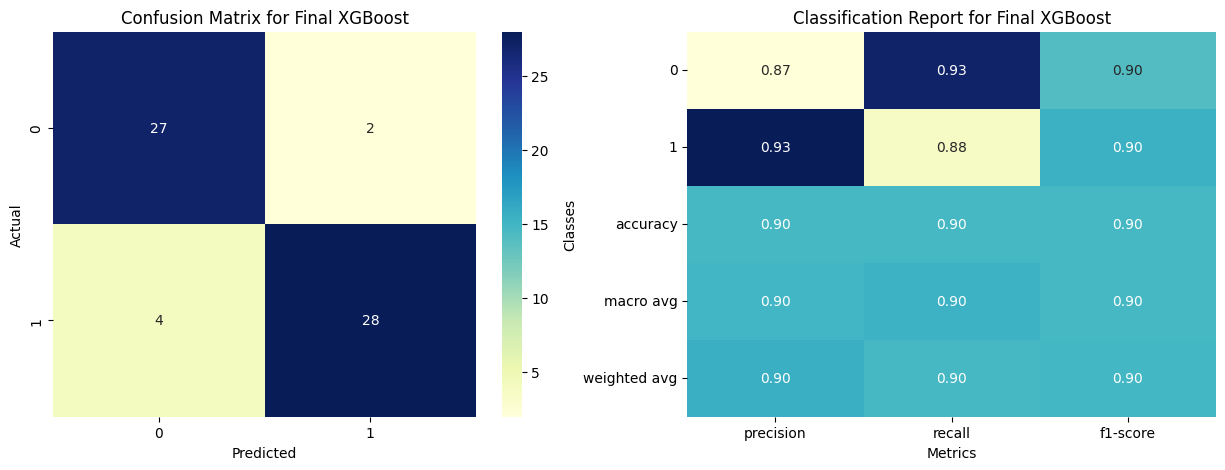

In [84]:

# Create the XGBoost model with the best parameters found from GridSearchCV
xgb_final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=0.3,
    learning_rate=0.08,
    max_depth=3,
    n_estimators=40,
    subsample=0.8,
    random_state=42
)

# Fit the optimized model to the training data
xgb_final_model.fit(X_train, y_train)

# Make predictions with the optimized model
xgb_final_pred = xgb_final_model.predict(X_test)

# Calculate probabilities for the positive class with the optimized model
y_final_proba = xgb_final_model.predict_proba(X_test)[:, 1]

# Calculate training accuracy with the optimized model
y_train_final_pred = xgb_final_model.predict(X_train)
training_final_accuracy = accuracy_score(y_train, y_train_final_pred)
print(f"Optimized Training Accuracy: {training_final_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores for the optimized model
cv_final_scores = cross_val_score(xgb_final_model, X_train, y_train, cv=5)

print(f"Optimized Cross-Validation Scores: {cv_final_scores}")
print(f"Optimized Average CV Score: {cv_final_scores.mean():.4f}")

# Calculate ROC-AUC-Scores
roc_auc = roc_auc_score(y_test, y_final_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# print results
print_results(y_test, y_final_proba, xgb_final_pred, 'Final XGBoost')

The results for the Final XGBoost model show a robust performance on the heart disease prediction task, with both high accuracy and consistency across various metrics:

- **Training Accuracy:** The model achieves a training accuracy of 90.08%, which is strong. This figure indicates that the model is fitting the training data well, but it is not excessively high, which might suggest a reduced risk of overfitting compared to models with near-perfect training accuracy.

- **Cross-Validation Scores:** The cross-validation scores range from 75.51% to 83.33%, with an average score of 79.75%. While there is a drop from the training accuracy, these scores still indicate good model performance. However, the variance in cross-validation scores suggests that the model's performance could vary with different subsets of data.

- **Confusion Matrix:** The model correctly predicted 27 out of 29 instances for the negative class (no heart disease) and 28 out of 32 instances for the positive class (heart disease). This result shows a balanced performance in identifying both classes, with slightly more false negatives (4) than false positives (2), which is a crucial consideration in medical diagnostics.

- **Classification Report:** The model displays an overall accuracy of 90% on the test data. The precision for the positive class is high at 0.93, indicating a high likelihood that predictions of heart disease are correct. The recall for the positive class is slightly lower at 0.88, which means the model captures 88% of the actual positive cases. These values result in an F1-score of 0.90 for both classes, which signifies an excellent balance between precision and recall.

In summary, the Final XGBoost model demonstrates good predictive ability, with an emphasis on precision that is particularly desirable in medical applications where false positives can lead to unnecessary treatments. Nonetheless, the false negatives, while relatively few, are particularly critical in medical scenarios because they represent missed diagnoses. The model's performance could be considered quite strong, though in a medical context, further validation and possibly recalibration might be pursued to reduce the number of false negatives even further. Additionally, given the nature of heart disease prediction, collaboration with clinical experts to interpret and evaluate the model’s predictions in practical settings would be essential.

##### **Feature Importance**

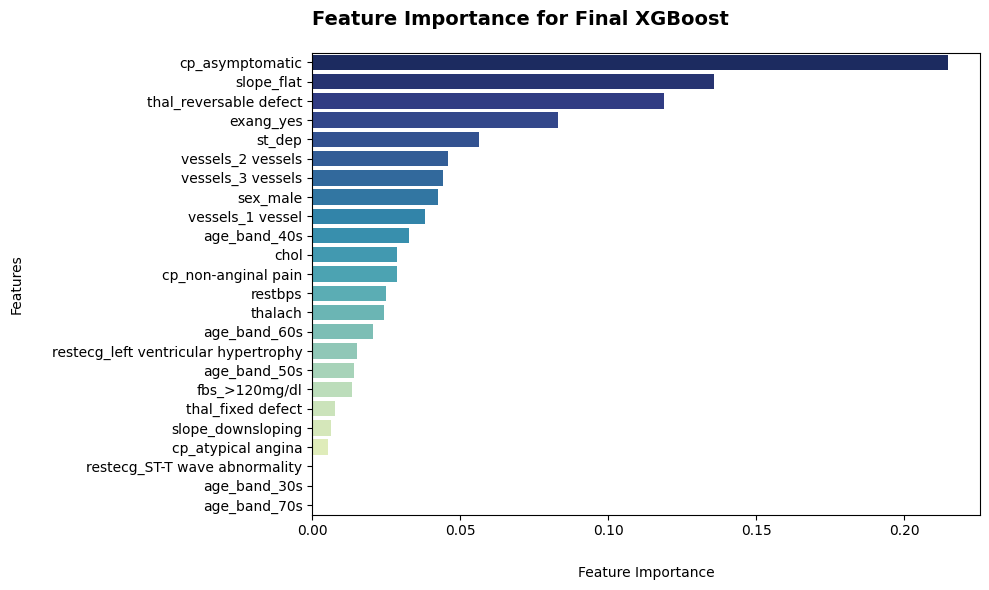

In [85]:
def plot_feature_importance(model, X_train, model_name, palette='Blues_r'):
    """
    Function to plot feature importance for a given model taking into account one-hot encoding and scaling.

    Parameters:
        model: Fitted model object.
        X_train: The training data with all transformations applied (scaling, encoding).
        model_name (str): Name of the model.
        palette (str, optional): Color palette for the plot. Default is 'Blues_r'.
    """
    # Get feature names directly from the transformed training data
    feature_names = X_train.columns

    # Retrieve and sort the model's feature importances
    feature_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette=palette)
    plt.xlabel('Feature Importance', labelpad=20)
    plt.ylabel('Features', labelpad=20)
    plt.title(f'Feature Importance for {model_name}', fontsize=14, loc='left', fontweight='bold', pad=20)
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
    plt.show()

# Use the function to plot feature importances for your trained models
plot_feature_importance(xgb_final_model, X_train, 'Final XGBoost ', palette='YlGnBu_r')



The feature importance chart for the Final XGBoost model displays the relative importance of each predictor in determining the presence of heart disease:

- cp_asymptomatic (asymptomatic chest pain) and slope_flat (the slope of the peak exercise ST segment) emerge as the most significant predictors. The prominence of asymptomatic chest pain suggests that patients without typical chest pain symptoms might still have a high risk of heart disease, which is an important finding for clinical diagnostics.
- Features related to thallium stress test results like thal_reversable_defect indicate that the presence of reversible defects on a thallium stress test is a key factor in predicting heart disease. This aligns with medical insights as reversible defects usually point to ischemia, which is a risk factor for heart disease.
- exang_yes (exercise-induced angina) and st_dep (ST depression) are also among the most influential features. These exercise-related indicators are well-established signs of potential heart complications.
- The number of major vessels colored by fluoroscopy, represented by features such as vessels_2 and vessels_3, also play a significant role. A higher number of vessels marked by fluoroscopy typically correlates with a higher chance of coronary artery disease.
- Additional features such as sex_male and vessels_1 suggest that gender and the number of affected coronary arteries are informative for the model's predictions.
- Interestingly, traditional risk factors such as cholesterol levels (chol) and resting blood pressure (restbps) appear to be less influential in this model, possibly due to the predictive power of the other variables that capture more specific risk aspects.

#### **Random Forest**
##### **Gridsearch**

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8180272108843537
Training Accuracy with Best Model: 0.9669
Cross-Validation Scores with Best Model: [0.79591837 0.87755102 0.75       0.85416667 0.8125    ]
Average CV Score with Best Model: 0.8180


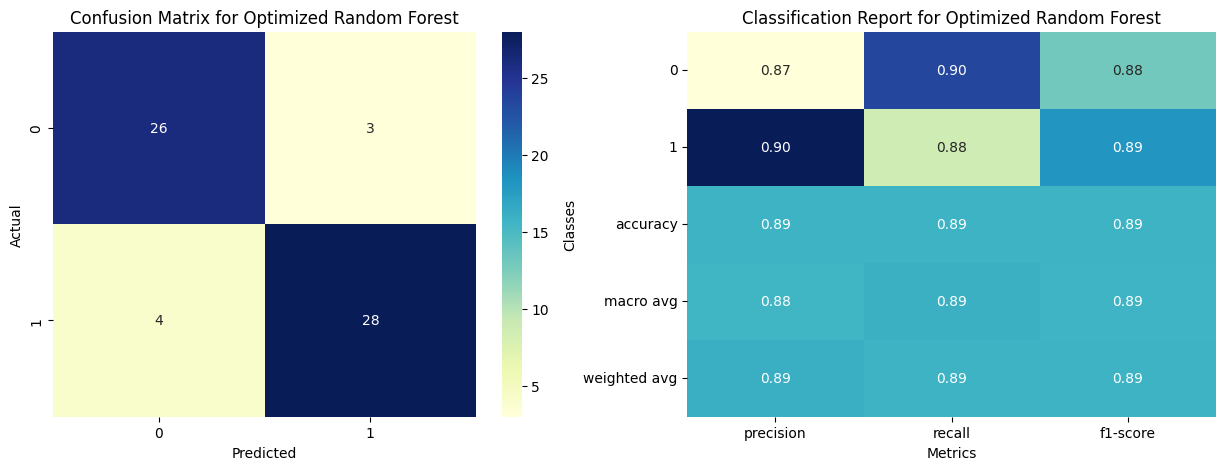

In [86]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]            # Method of selecting samples for training each tree
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,  # Use all cores
    verbose=2   # Higher number prints more information
)

# Fit the GridSearchCV object to the preprocessed training data (use X_train from preprocessor)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

# Use the best estimator to make predictions
rf_best_model = grid_search.best_estimator_
rf_best_pred = rf_best_model.predict(X_test)  # Use the preprocessed X_test here (X_val)
rf_best_proba = rf_best_model.predict_proba(X_test)[:, 1]

# Calculate training accuracy with the best model
y_train_best_pred = rf_best_model.predict(X_train)
training_best_accuracy = accuracy_score(y_train, y_train_best_pred)
print(f"Training Accuracy with Best Model: {training_best_accuracy:.4f}")

# Perform 5-fold cross-validation to get the validation scores with the best model
cv_best_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores with Best Model: {cv_best_scores}")
print(f"Average CV Score with Best Model: {cv_best_scores.mean():.4f}")

# print results
print_results(y_test, rf_best_proba, rf_best_pred, 'Optimized Random Forest')


##### **Finetuning**

Training Accuracy with Best Model: 0.9545
Cross-Validation Scores with Best Model: [0.75510204 0.83673469 0.75       0.79166667 0.79166667]
Average CV Score with Best Model: 0.7850
ROC-AUC Score: 0.9440


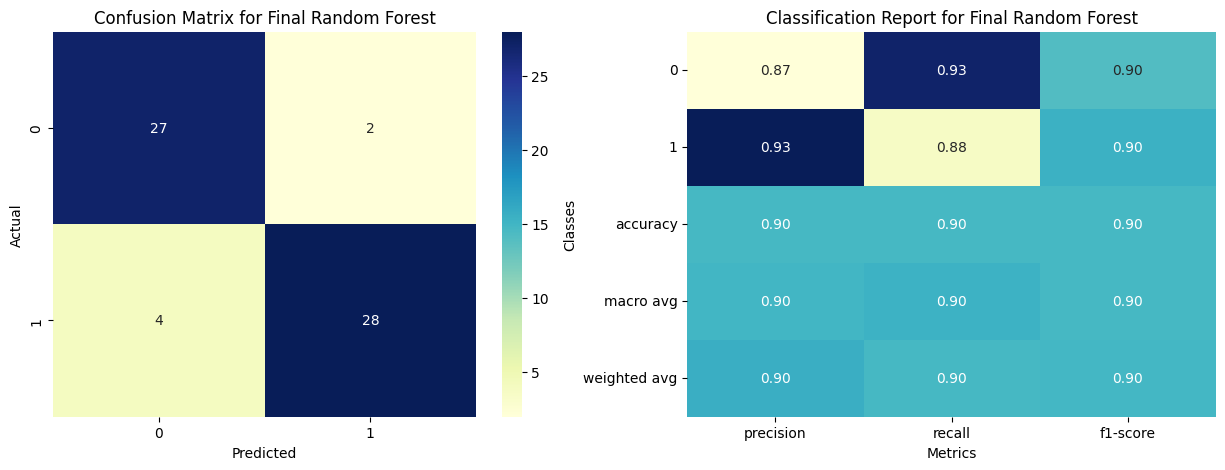

In [87]:
# Create the RandomForest model with the best parameters
rf_best_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,           # 'None' means the nodes are expanded until all leaves are pure
    min_samples_leaf=2,       # The minimum number of samples required to be at a leaf node
    min_samples_split=2,      # The minimum number of samples required to split an internal node
    n_estimators=60,         # Number of trees in the forest
    random_state=42
)

# Fit the model to the training data
rf_best_model.fit(X_train, y_train)

# Calculate probabilities for the positive class on the validation data
y_proba_best = rf_best_model.predict_proba(X_test)[:, 1]

# Make predictions on the test data
rf_pred_best = rf_best_model.predict(X_test)

# Calculate training accuracy with the best model
y_train_pred_best = rf_best_model.predict(X_train)
training_accuracy_best = accuracy_score(y_train, y_train_pred_best)
print(f"Training Accuracy with Best Model: {training_accuracy_best:.4f}")

# Perform 5-fold cross-validation to get the validation scores with the best model
cv_scores_best = cross_val_score(rf_best_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores with Best Model: {cv_scores_best}")
print(f"Average CV Score with Best Model: {cv_scores_best.mean():.4f}")

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_best)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# print results
print_results(y_test, y_proba_best, rf_pred_best, 'Final Random Forest')


The results for the optimized Random Forest model suggest a strong performance on the dataset for predicting heart disease:

- **Training Accuracy:** The model achieves a training accuracy of 95.45%, indicating a good fit to the training data. However, such a high training accuracy relative to the cross-validation score still suggest some overfitting.

- **Cross-Validation Scores:** The cross-validation scores are somewhat lower than the training accuracy, ranging from 75.51% to 83.67%, with an average of 78.50%. This spread suggests that while the model has learned the training data well, its performance varies more when applied to unseen data, which is a sign of overfitting. It is important for the model to generalize well, and not just perform well on the training data.

- **Confusion Matrix:** The matrix shows that the model correctly identified 27 cases as negative (true negatives) and 28 cases as positive (true positives). It incorrectly predicted 2 negative cases as positive (false positives) and 4 positive cases as negative (false negatives). In a medical context, false negatives can be of particular concern as they represent missed diagnoses.

- **Classification Report:** The report indicates an overall accuracy of 90%, with high precision and recall scores across both classes:

    - Precision for class 0 (no disease) is 0.87 and for class 1 (disease) is 0.93, suggesting the model is quite good at predicting the positive class.
    - Recall for class 0 is 0.93, which is excellent, but slightly lower for class 1 at 0.88.
    - The F1-score, which balances precision and recall, is consistently high at 0.90 for both classes.

In summary, the model exhibits strong predictive power as indicated by the test metrics, with high accuracy and F1-scores. However, the discrepancy between the training accuracy and cross-validation scores suggests that the model could be overfitting to the training data, a common issue with Random Forest models when they have a large number of trees or are not sufficiently regularized. It's important in clinical settings to balance the predictive power of the model with its ability to generalize to unseen data, as the cost of false negatives can be very high. Therefore, while the model is performing well, care should be taken in evaluating how it might perform in a real-world clinical setting. Further validation, such as using an independent test set or deploying the model in a controlled clinical trial, could be necessary to ensure its reliability.

##### **Feature Importance**

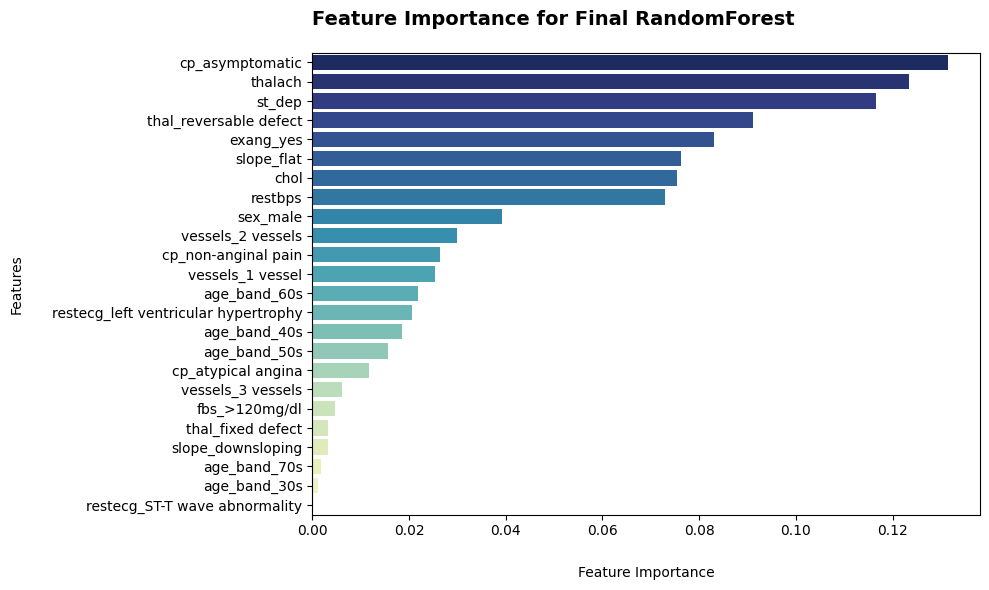

In [88]:
# Use the function to plot feature importances for your trained models
plot_feature_importance(rf_best_model, X_train, 'Final RandomForest ', palette='YlGnBu_r')



The feature importance plot for the Final RandomForest model provides insight into which factors are most predictive of heart disease according to the model’s learned patterns. Here are some interpretations:

- The most influential feature is cp_asymptomatic, which refers to the type of chest pain experienced. Asymptomatic chest pain being the most important feature suggests that the absence of chest pain symptoms is strongly associated with the presence or absence of heart disease in the model's predictions.
- The thalach feature, indicating maximum heart rate achieved, also shows significant importance. Typically, a lower maximum heart rate during exercise could be indicative of heart disease, which aligns with common medical knowledge.
- st_dep, referring to ST depression induced by exercise relative to rest, is another top feature. ST depression can be a sign of myocardial ischemia, making its high importance reasonable.
- Features related to thallium stress test results, such as thal_reversable_defect and thal_fixed_defect, are also key predictors. Thallium tests assess blood flow to the heart muscle, and defects can indicate areas with poor blood flow or scarring from previous heart attacks.
- exang_yes, denoting exercise-induced angina, is a predictive feature, suggesting that experiencing chest pain during exercise is a significant predictor.
- The slope of the peak exercise ST segment (slope_flat) and cholesterol levels (chol) are also among the important features. These are known risk factors in heart disease.
- Surprisingly, typical symptoms like restbps (resting blood pressure) and sex_male are less important in this model, indicating that other features may provide more specific information for the model’s predictions.
- Age bands and various types of chest pain (other than asymptomatic) have lower importance scores, suggesting they contribute less to the model’s decision-making process when compared to the top features.

In general, the model's reliance on these features corresponds well with clinical understanding, as many of the top features are recognized risk factors or symptoms of heart disease. It’s important to note that feature importance does not imply causation, and these findings should be used as a starting point for further clinical investigation rather than definitive proof of risk factors.

## **Conclusion**



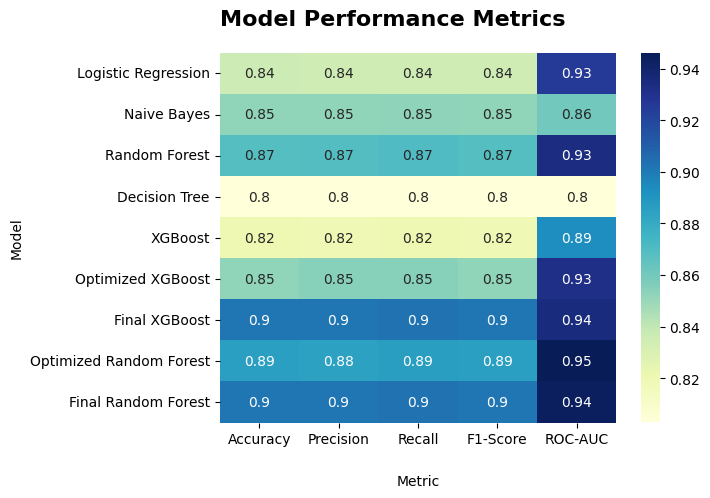

In [89]:
# Heatmap with gradient colors for metrics
sns.heatmap(model_metrics.iloc[:, 1:], annot=True, cmap='YlGnBu', yticklabels=model_metrics['Model'])

# Labels
plt.xlabel('Metric', labelpad=20)
plt.ylabel('Model')
plt.title("Model Performance Metrics", fontsize=16, fontweight="bold", pad=20, loc="left")

# Display
plt.show()


### **Best model**

In my project, I aimed to predict the presence or absence of a heart disease—using various machine learning models. The initial phase involved setting up baseline models, including Logistic Regression, Naive Bayes, Decision Trees, Random Forest, and XGBoost. These models were evaluated based on their accuracy, precision, recall, F1-score, ROC-AUC score and cross-validation-scores, which are key indicators of a model's predictive performance.

- Through this preliminary phase, I identified Random Forest and XGBoost as top performers. These models underwent hyperparameter tuning—a process of adjusting the algorithms to improve their performance. The tuning process led to what I refer to as the "Optimized" models.

- I further fine-tuned these optimized models to refine their performance, yielding the "Final" models. The metrics of these final models were telling. For the Final XGBoost and Random Forest models, I reached **0.90 in accuracy, precision, recall and f1-score and an ROC-AUC score of 0.94.** The Optimized Random Forest model showcased an even higher ROC-AUC score of 0.95.

- However, if we are also concerned with how the model will generalize to new, unseen data, the Optimized XGBoost presents a strong case with its balance of high training accuracy and solid cross-validation scores.

### **Feature Importances**

What truly stands out are the feature importance graphs, which highlight the variables most influential in the models' predictions. 

Features like 'cp_asymptomatic', 'thalach', 'st_dep', and 'thal_reversable_defect' were critical for both final models, implying these could be key indicators in the dataset for predicting a heart disease:

- **cp_asymptomatic:** Indicates the absence of chest pain, suggesting the possibility of silent ischemia, where heart issues are present without typical symptoms.

- **thalach:** Represents the maximum heart rate achieved during stress testing. Higher values generally suggest better cardiovascular fitness.

- **st_dep:** Refers to ST depression observed in ECG readings during exercise, often indicating underlying heart issues like ischemia.

- **thal_reversible_defect:** Detected through thallium stress tests, this indicates areas of the heart that may suffer from temporary poor blood flow, commonly associated with coronary artery disease.

### **Outlook**

Moving forward, there are several avenues to potentially improve the models further. One strategy could be to collect more data, especially from underrepresented groups, to enhance the model's robustness and ensure it performs well across diverse populations. Additionally, incorporating more comprehensive clinical data, such as detailed laboratory results or imaging studies, could provide deeper insights for the models to learn from.

Experimenting with different machine learning techniques, such as ensemble methods or advanced neural networks, might also uncover patterns that the current models do not capture. Moreover, periodic retraining of the models with new data can help them adapt to changing patterns in patient health and disease presentation over time.

In terms of utility, these models can be incredibly valuable in clinical decision support systems, helping healthcare professionals quickly assess the risk of disease and prioritize patient care. They can also be used in remote monitoring systems, analyzing data from wearable health devices to alert users and healthcare providers about potential health issues.

Furthermore, the insights gained from feature importance can guide clinical research by highlighting potential areas of interest for further investigation, which could lead to new understandings and treatments for heart disease.

By continuing to refine these models and integrate them into healthcare workflows, we can enhance the timely diagnosis and treatment of diseases, ultimately improving patient outcomes and advancing the field of predictive medicine.
